In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

In [3]:
#Extract data from the dataset

In [4]:
#If data has not been downloaded yet then download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [5]:
fldr="./UTKFace"

In [7]:
import os
flies=os.listdir(fldr)

In [8]:
#Create List of Images from the dataset

In [9]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)
    

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/110_1_0_20170120134701015.jpg.chip.jpg
./UTKFace/110_1_1_20170110155201038.jpg.chip.jpg
./UTKFace/110_1_3_20170110155139762.jpg.chip.jpg
./UTKFace/111_1_0_20170120134646399.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725990.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725991.jpg.chip.jpg
./UTKFace/115_1_1_20170112213257263.jpg.chip.jpg
./UTKFace/116_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/116_1_0_20170120134921760.jpg.chip.jpg
./UTKFace/116_1_2_20170112220255503.jpg.chip.jpg
./UTKFace/116_1_3_20170120134744096.jpg.chip.jpg
./UTKFace/11_0_0_20170103200509559.jpg.chip.jpg
./UTKFace/11_0_0_20170103200824775.jpg.chip.jpg
./UTKFace/11_0_0_20170104012556563.jpg.chip.jpg
./UTKFace/11_0_0_20170110220408722.jpg.chip.jpg
./UTKFace/11_0_0_20170110220453002.jpg.chip.jpg
./UTKFace/11_0_0_20170110220500946.jpg.chip.jpg
./UTKFace/11_0_0_20170110220518578.jpg.chip.jpg
./UTKFace/11_0_0_20170110220657089.jpg.chip.jpg
./UTKFace/11_0_0_20170110220710576.jpg.chip.jpg
./UTKFace/11_0_0_201701102242

./UTKFace/12_1_2_20170109203838187.jpg.chip.jpg
./UTKFace/12_1_2_20170109214246240.jpg.chip.jpg
./UTKFace/12_1_2_20170116190115810.jpg.chip.jpg
./UTKFace/12_1_2_20170116194059753.jpg.chip.jpg
./UTKFace/12_1_2_20170117145333545.jpg.chip.jpg
./UTKFace/12_1_2_20170117165908225.jpg.chip.jpg
./UTKFace/12_1_2_20170117194013371.jpg.chip.jpg
./UTKFace/12_1_3_20161220222343139.jpg.chip.jpg
./UTKFace/12_1_3_20170104012400657.jpg.chip.jpg
./UTKFace/12_1_3_20170104013517483.jpg.chip.jpg
./UTKFace/12_1_3_20170104221704334.jpg.chip.jpg
./UTKFace/12_1_3_20170104221910239.jpg.chip.jpg
./UTKFace/12_1_3_20170104223448631.jpg.chip.jpg
./UTKFace/12_1_3_20170104223643593.jpg.chip.jpg
./UTKFace/12_1_3_20170117152932909.jpg.chip.jpg
./UTKFace/12_1_3_20170117154644725.jpg.chip.jpg
./UTKFace/12_1_3_20170117174916351.jpg.chip.jpg
./UTKFace/12_1_4_20161223230033380.jpg.chip.jpg
./UTKFace/12_1_4_20170103200721583.jpg.chip.jpg
./UTKFace/12_1_4_20170103200804119.jpg.chip.jpg
./UTKFace/12_1_4_20170104011715593.jpg.c

./UTKFace/14_1_0_20170109204846649.jpg.chip.jpg
./UTKFace/14_1_0_20170109204918699.jpg.chip.jpg
./UTKFace/14_1_0_20170109205344937.jpg.chip.jpg
./UTKFace/14_1_0_20170109205406978.jpg.chip.jpg
./UTKFace/14_1_0_20170109212518607.jpg.chip.jpg
./UTKFace/14_1_0_20170109212651931.jpg.chip.jpg
./UTKFace/14_1_0_20170109212749213.jpg.chip.jpg
./UTKFace/14_1_0_20170109212753539.jpg.chip.jpg
./UTKFace/14_1_0_20170109212926958.jpg.chip.jpg
./UTKFace/14_1_0_20170109213221821.jpg.chip.jpg
./UTKFace/14_1_0_20170109213522480.jpg.chip.jpg
./UTKFace/14_1_0_20170109213541777.jpg.chip.jpg
./UTKFace/14_1_0_20170109213548658.jpg.chip.jpg
./UTKFace/14_1_0_20170109213635068.jpg.chip.jpg
./UTKFace/14_1_0_20170109214345916.jpg.chip.jpg
./UTKFace/14_1_0_20170109214349442.jpg.chip.jpg
./UTKFace/14_1_0_20170109214428765.jpg.chip.jpg
./UTKFace/14_1_0_20170109214440556.jpg.chip.jpg
./UTKFace/14_1_0_20170109214501715.jpg.chip.jpg
./UTKFace/14_1_0_20170109214635943.jpg.chip.jpg
./UTKFace/14_1_0_20170109214707410.jpg.c

./UTKFace/15_1_0_20170116201351655.jpg.chip.jpg
./UTKFace/15_1_0_20170116232438243.jpg.chip.jpg
./UTKFace/15_1_0_20170117134420894.jpg.chip.jpg
./UTKFace/15_1_1_20170104005130400.jpg.chip.jpg
./UTKFace/15_1_1_20170104011851042.jpg.chip.jpg
./UTKFace/15_1_1_20170104012002526.jpg.chip.jpg
./UTKFace/15_1_1_20170109212440397.jpg.chip.jpg
./UTKFace/15_1_1_20170109214142778.jpg.chip.jpg
./UTKFace/15_1_1_20170112191208424.jpg.chip.jpg
./UTKFace/15_1_1_20170112191212510.jpg.chip.jpg
./UTKFace/15_1_1_20170112191307797.jpg.chip.jpg
./UTKFace/15_1_1_20170112210325253.jpg.chip.jpg
./UTKFace/15_1_1_20170112230538604.jpg.chip.jpg
./UTKFace/15_1_1_20170112230550725.jpg.chip.jpg
./UTKFace/15_1_1_20170116000638538.jpg.chip.jpg
./UTKFace/15_1_1_20170116164052068.jpg.chip.jpg
./UTKFace/15_1_2_20161219190855506.jpg.chip.jpg
./UTKFace/15_1_2_20161219193333691.jpg.chip.jpg
./UTKFace/15_1_2_20170102234824195.jpg.chip.jpg
./UTKFace/15_1_2_20170104012024121.jpg.chip.jpg
./UTKFace/15_1_2_20170104012031136.jpg.c

./UTKFace/16_1_0_20170109204155179.jpg.chip.jpg
./UTKFace/16_1_0_20170109204349968.jpg.chip.jpg
./UTKFace/16_1_0_20170109204409777.jpg.chip.jpg
./UTKFace/16_1_0_20170109204530608.jpg.chip.jpg
./UTKFace/16_1_0_20170109205435776.jpg.chip.jpg
./UTKFace/16_1_0_20170109212357604.jpg.chip.jpg
./UTKFace/16_1_0_20170109212413425.jpg.chip.jpg
./UTKFace/16_1_0_20170109212446278.jpg.chip.jpg
./UTKFace/16_1_0_20170109212513215.jpg.chip.jpg
./UTKFace/16_1_0_20170109212525685.jpg.chip.jpg
./UTKFace/16_1_0_20170109212548663.jpg.chip.jpg
./UTKFace/16_1_0_20170109212802540.jpg.chip.jpg
./UTKFace/16_1_0_20170109212859323.jpg.chip.jpg
./UTKFace/16_1_0_20170109212959831.jpg.chip.jpg
./UTKFace/16_1_0_20170109213003514.jpg.chip.jpg
./UTKFace/16_1_0_20170109213007401.jpg.chip.jpg
./UTKFace/16_1_0_20170109213044006.jpg.chip.jpg
./UTKFace/16_1_0_20170109213117588.jpg.chip.jpg
./UTKFace/16_1_0_20170109213357694.jpg.chip.jpg
./UTKFace/16_1_0_20170109213440225.jpg.chip.jpg
./UTKFace/16_1_0_20170109213443708.jpg.c

./UTKFace/17_1_0_20170109213621558.jpg.chip.jpg
./UTKFace/17_1_0_20170109213642438.jpg.chip.jpg
./UTKFace/17_1_0_20170109213916364.jpg.chip.jpg
./UTKFace/17_1_0_20170109213929449.jpg.chip.jpg
./UTKFace/17_1_0_20170109213933756.jpg.chip.jpg
./UTKFace/17_1_0_20170109213944067.jpg.chip.jpg
./UTKFace/17_1_0_20170109214008165.jpg.chip.jpg
./UTKFace/17_1_0_20170109214021426.jpg.chip.jpg
./UTKFace/17_1_0_20170109214048004.jpg.chip.jpg
./UTKFace/17_1_0_20170109214200825.jpg.chip.jpg
./UTKFace/17_1_0_20170109214431887.jpg.chip.jpg
./UTKFace/17_1_0_20170109214542387.jpg.chip.jpg
./UTKFace/17_1_0_20170109214546339.jpg.chip.jpg
./UTKFace/17_1_0_20170109214703699.jpg.chip.jpg
./UTKFace/17_1_0_20170111182452732.jpg.chip.jpg
./UTKFace/17_1_0_20170113210605193.jpg.chip.jpg
./UTKFace/17_1_0_20170116222802508.jpg.chip.jpg
./UTKFace/17_1_0_20170117135219333.jpg.chip.jpg
./UTKFace/17_1_0_20170117140619087.jpg.chip.jpg
./UTKFace/17_1_1_20170103201529736.jpg.chip.jpg
./UTKFace/17_1_1_20170103222937063.jpg.c

./UTKFace/18_1_0_20170109213624244.jpg.chip.jpg
./UTKFace/18_1_0_20170109213856511.jpg.chip.jpg
./UTKFace/18_1_0_20170109213904824.jpg.chip.jpg
./UTKFace/18_1_0_20170109213911368.jpg.chip.jpg
./UTKFace/18_1_0_20170109213919463.jpg.chip.jpg
./UTKFace/18_1_0_20170109213922168.jpg.chip.jpg
./UTKFace/18_1_0_20170109213931089.jpg.chip.jpg
./UTKFace/18_1_0_20170109213933756.jpg.chip.jpg
./UTKFace/18_1_0_20170109213935367.jpg.chip.jpg
./UTKFace/18_1_0_20170109213938695.jpg.chip.jpg
./UTKFace/18_1_0_20170109213945602.jpg.chip.jpg
./UTKFace/18_1_0_20170109214004496.jpg.chip.jpg
./UTKFace/18_1_0_20170109214042490.jpg.chip.jpg
./UTKFace/18_1_0_20170109214044181.jpg.chip.jpg
./UTKFace/18_1_0_20170109214106546.jpg.chip.jpg
./UTKFace/18_1_0_20170109214113667.jpg.chip.jpg
./UTKFace/18_1_0_20170109214116215.jpg.chip.jpg
./UTKFace/18_1_0_20170109214120554.jpg.chip.jpg
./UTKFace/18_1_0_20170109214122492.jpg.chip.jpg
./UTKFace/18_1_0_20170109214156684.jpg.chip.jpg
./UTKFace/18_1_0_20170109214215051.jpg.c

./UTKFace/19_1_0_20170109212458403.jpg.chip.jpg
./UTKFace/19_1_0_20170109212903959.jpg.chip.jpg
./UTKFace/19_1_0_20170109213113295.jpg.chip.jpg
./UTKFace/19_1_0_20170109213228173.jpg.chip.jpg
./UTKFace/19_1_0_20170109213247084.jpg.chip.jpg
./UTKFace/19_1_0_20170109214615122.jpg.chip.jpg
./UTKFace/19_1_0_20170112231655238.jpg.chip.jpg
./UTKFace/19_1_0_20170116163837603.jpg.chip.jpg
./UTKFace/19_1_0_20170116201120465.jpg.chip.jpg
./UTKFace/19_1_0_20170116205908124.jpg.chip.jpg
./UTKFace/19_1_0_20170116212113630.jpg.chip.jpg
./UTKFace/19_1_0_20170117140530071.jpg.chip.jpg
./UTKFace/19_1_0_20170119145731470.jpg.chip.jpg
./UTKFace/19_1_1_20170112191242381.jpg.chip.jpg
./UTKFace/19_1_1_20170112231417629.jpg.chip.jpg
./UTKFace/19_1_1_20170113012937783.jpg.chip.jpg
./UTKFace/19_1_1_20170114030819891.jpg.chip.jpg
./UTKFace/19_1_1_20170114030824961.jpg.chip.jpg
./UTKFace/19_1_1_20170117124021486.jpg.chip.jpg
./UTKFace/19_1_1_20170117195435822.jpg.chip.jpg
./UTKFace/19_1_2_20170104005053831.jpg.c

./UTKFace/1_0_1_20170110213700642.jpg.chip.jpg
./UTKFace/1_0_1_20170110213701704.jpg.chip.jpg
./UTKFace/1_0_1_20170110213707879.jpg.chip.jpg
./UTKFace/1_0_1_20170110213808936.jpg.chip.jpg
./UTKFace/1_0_1_20170110213810856.jpg.chip.jpg
./UTKFace/1_0_1_20170112211228948.jpg.chip.jpg
./UTKFace/1_0_1_20170117130048013.jpg.chip.jpg
./UTKFace/1_0_2_20161219140525218.jpg.chip.jpg
./UTKFace/1_0_2_20161219140530307.jpg.chip.jpg
./UTKFace/1_0_2_20161219140540938.jpg.chip.jpg
./UTKFace/1_0_2_20161219140744200.jpg.chip.jpg
./UTKFace/1_0_2_20161219140748280.jpg.chip.jpg
./UTKFace/1_0_2_20161219140756601.jpg.chip.jpg
./UTKFace/1_0_2_20161219140811232.jpg.chip.jpg
./UTKFace/1_0_2_20161219140913256.jpg.chip.jpg
./UTKFace/1_0_2_20161219140929864.jpg.chip.jpg
./UTKFace/1_0_2_20161219140952943.jpg.chip.jpg
./UTKFace/1_0_2_20161219141023272.jpg.chip.jpg
./UTKFace/1_0_2_20161219141101408.jpg.chip.jpg
./UTKFace/1_0_2_20161219141226856.jpg.chip.jpg
./UTKFace/1_0_2_20161219141529089.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219204409620.jpg.chip.jpg
./UTKFace/1_0_2_20161219204418485.jpg.chip.jpg
./UTKFace/1_0_2_20161219204515493.jpg.chip.jpg
./UTKFace/1_0_2_20161219204634589.jpg.chip.jpg
./UTKFace/1_0_2_20161219204653181.jpg.chip.jpg
./UTKFace/1_0_2_20161219204655933.jpg.chip.jpg
./UTKFace/1_0_2_20161219204736996.jpg.chip.jpg
./UTKFace/1_0_2_20161219204836612.jpg.chip.jpg
./UTKFace/1_0_2_20161219204845029.jpg.chip.jpg
./UTKFace/1_0_2_20161219204848341.jpg.chip.jpg
./UTKFace/1_0_2_20161219204858548.jpg.chip.jpg
./UTKFace/1_0_2_20161219204951309.jpg.chip.jpg
./UTKFace/1_0_2_20161219204958037.jpg.chip.jpg
./UTKFace/1_0_2_20161219205016902.jpg.chip.jpg
./UTKFace/1_0_2_20161219205107772.jpg.chip.jpg
./UTKFace/1_0_2_20161219205111061.jpg.chip.jpg
./UTKFace/1_0_2_20161219205225773.jpg.chip.jpg
./UTKFace/1_0_2_20161219205313061.jpg.chip.jpg
./UTKFace/1_0_2_20161219205318388.jpg.chip.jpg
./UTKFace/1_0_2_20161219205548949.jpg.chip.jpg
./UTKFace/1_0_2_20161219205702141.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_3_20161220220038618.jpg.chip.jpg
./UTKFace/1_0_3_20161220220040611.jpg.chip.jpg
./UTKFace/1_0_3_20161220220110553.jpg.chip.jpg
./UTKFace/1_0_3_20161220220116873.jpg.chip.jpg
./UTKFace/1_0_3_20161220220154425.jpg.chip.jpg
./UTKFace/1_0_3_20161220220317465.jpg.chip.jpg
./UTKFace/1_0_3_20161220220355890.jpg.chip.jpg
./UTKFace/1_0_3_20161220220358441.jpg.chip.jpg
./UTKFace/1_0_3_20161220220411577.jpg.chip.jpg
./UTKFace/1_0_3_20161220220418690.jpg.chip.jpg
./UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
./UTKFace/1_0_3_20161220220529033.jpg.chip.jpg
./UTKFace/1_0_3_20161220220544050.jpg.chip.jpg
./UTKFace/1_0_3_20161220220606705.jpg.chip.jpg
./UTKFace/1_0_3_20161220220910514.jpg.chip.jpg
./UTKFace/1_0_3_20161220221612859.jpg.chip.jpg
./UTKFace/1_0_3_20161220221616882.jpg.chip.jpg
./UTKFace/1_0_3_20161220221723490.jpg.chip.jpg
./UTKFace/1_0_3_20161220222436891.jpg.chip.jpg
./UTKFace/1_0_3_20161220222441595.jpg.chip.jpg
./UTKFace/1_0_3_20161220222443283.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_1_0_20170109192451846.jpg.chip.jpg
./UTKFace/1_1_0_20170109192728714.jpg.chip.jpg
./UTKFace/1_1_0_20170109192729677.jpg.chip.jpg
./UTKFace/1_1_0_20170109192737181.jpg.chip.jpg
./UTKFace/1_1_0_20170109192752097.jpg.chip.jpg
./UTKFace/1_1_0_20170109192755957.jpg.chip.jpg
./UTKFace/1_1_0_20170109193014933.jpg.chip.jpg
./UTKFace/1_1_0_20170109193015973.jpg.chip.jpg
./UTKFace/1_1_0_20170109193017247.jpg.chip.jpg
./UTKFace/1_1_0_20170109193018259.jpg.chip.jpg
./UTKFace/1_1_0_20170109193022683.jpg.chip.jpg
./UTKFace/1_1_0_20170109193026103.jpg.chip.jpg
./UTKFace/1_1_0_20170109193120893.jpg.chip.jpg
./UTKFace/1_1_0_20170109193401456.jpg.chip.jpg
./UTKFace/1_1_0_20170109193407724.jpg.chip.jpg
./UTKFace/1_1_0_20170109193408973.jpg.chip.jpg
./UTKFace/1_1_0_20170109193427612.jpg.chip.jpg
./UTKFace/1_1_0_20170109193455503.jpg.chip.jpg
./UTKFace/1_1_0_20170109193704430.jpg.chip.jpg
./UTKFace/1_1_0_20170109193717283.jpg.chip.jpg
./UTKFace/1_1_0_20170109193726686.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_2_20161219221706807.jpg.chip.jpg
./UTKFace/1_1_2_20161219221915303.jpg.chip.jpg
./UTKFace/1_1_2_20161219221943799.jpg.chip.jpg
./UTKFace/1_1_2_20161219222021335.jpg.chip.jpg
./UTKFace/1_1_2_20161219222144951.jpg.chip.jpg
./UTKFace/1_1_2_20161219222154119.jpg.chip.jpg
./UTKFace/1_1_2_20161219222703503.jpg.chip.jpg
./UTKFace/1_1_2_20161219222758263.jpg.chip.jpg
./UTKFace/1_1_2_20161219222801647.jpg.chip.jpg
./UTKFace/1_1_2_20161220220018380.jpg.chip.jpg
./UTKFace/1_1_2_20161221192810669.jpg.chip.jpg
./UTKFace/1_1_2_20170109190752762.jpg.chip.jpg
./UTKFace/1_1_2_20170109193557242.jpg.chip.jpg
./UTKFace/1_1_2_20170109193844660.jpg.chip.jpg
./UTKFace/1_1_2_20170109194007910.jpg.chip.jpg
./UTKFace/1_1_2_20170117192827229.jpg.chip.jpg
./UTKFace/1_1_3_20161219224454728.jpg.chip.jpg
./UTKFace/1_1_3_20161219224457585.jpg.chip.jpg
./UTKFace/1_1_3_20161219224458872.jpg.chip.jpg
./UTKFace/1_1_3_20161219224539488.jpg.chip.jpg
./UTKFace/1_1_3_20161219224553880.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/20_0_0_20170117134248038.jpg.chip.jpg
./UTKFace/20_0_0_20170117134631710.jpg.chip.jpg
./UTKFace/20_0_0_20170117135525494.jpg.chip.jpg
./UTKFace/20_0_0_20170117140056058.jpg.chip.jpg
./UTKFace/20_0_0_20170117140133828.jpg.chip.jpg
./UTKFace/20_0_0_20170117140628568.jpg.chip.jpg
./UTKFace/20_0_0_20170117140636216.jpg.chip.jpg
./UTKFace/20_0_0_20170117140705537.jpg.chip.jpg
./UTKFace/20_0_0_20170117140842001.jpg.chip.jpg
./UTKFace/20_0_0_20170117141002911.jpg.chip.jpg
./UTKFace/20_0_0_20170117141041394.jpg.chip.jpg
./UTKFace/20_0_0_20170117151603012.jpg.chip.jpg
./UTKFace/20_0_0_20170120133527581.jpg.chip.jpg
./UTKFace/20_0_0_20170120133547085.jpg.chip.jpg
./UTKFace/20_0_1_20170112191235269.jpg.chip.jpg
./UTKFace/20_0_1_20170113132343593.jpg.chip.jpg
./UTKFace/20_0_1_20170113132355967.jpg.chip.jpg
./UTKFace/20_0_1_20170113132411433.jpg.chip.jpg
./UTKFace/20_0_1_20170113132537718.jpg.chip.jpg
./UTKFace/20_0_1_20170113132622368.jpg.chip.jpg
./UTKFace/20_0_1_20170113132703608.jpg.c

./UTKFace/20_1_3_20170104231832057.jpg.chip.jpg
./UTKFace/20_1_3_20170104233643891.jpg.chip.jpg
./UTKFace/20_1_3_20170105000847091.jpg.chip.jpg
./UTKFace/20_1_3_20170117141108233.jpg.chip.jpg
./UTKFace/20_1_3_20170117141155272.jpg.chip.jpg
./UTKFace/20_1_3_20170119144712261.jpg.chip.jpg
./UTKFace/20_1_3_20170119150812423.jpg.chip.jpg
./UTKFace/20_1_3_20170119151017902.jpg.chip.jpg
./UTKFace/20_1_3_20170119153148521.jpg.chip.jpg
./UTKFace/20_1_3_20170119153308793.jpg.chip.jpg
./UTKFace/20_1_3_20170119153311735.jpg.chip.jpg
./UTKFace/20_1_3_20170119153422217.jpg.chip.jpg
./UTKFace/20_1_3_20170119153518449.jpg.chip.jpg
./UTKFace/20_1_3_20170119153712943.jpg.chip.jpg
./UTKFace/20_1_3_20170119153750257.jpg.chip.jpg
./UTKFace/20_1_3_20170119153755113.jpg.chip.jpg
./UTKFace/20_1_3_20170119153820321.jpg.chip.jpg
./UTKFace/20_1_3_20170119180453339.jpg.chip.jpg
./UTKFace/20_1_3_20170119180826861.jpg.chip.jpg
./UTKFace/20_1_4_20161223230050564.jpg.chip.jpg
./UTKFace/20_1_4_20161223230110540.jpg.c

./UTKFace/21_1_0_20170109213135260.jpg.chip.jpg
./UTKFace/21_1_0_20170109213908912.jpg.chip.jpg
./UTKFace/21_1_0_20170109214656355.jpg.chip.jpg
./UTKFace/21_1_0_20170111182452742.jpg.chip.jpg
./UTKFace/21_1_0_20170112233431458.jpg.chip.jpg
./UTKFace/21_1_0_20170112233433959.jpg.chip.jpg
./UTKFace/21_1_0_20170112233608086.jpg.chip.jpg
./UTKFace/21_1_0_20170112233610183.jpg.chip.jpg
./UTKFace/21_1_0_20170114032157249.jpg.chip.jpg
./UTKFace/21_1_0_20170116205856338.jpg.chip.jpg
./UTKFace/21_1_0_20170116214341701.jpg.chip.jpg
./UTKFace/21_1_0_20170116214441148.jpg.chip.jpg
./UTKFace/21_1_0_20170116214444473.jpg.chip.jpg
./UTKFace/21_1_0_20170116215450607.jpg.chip.jpg
./UTKFace/21_1_0_20170116215627769.jpg.chip.jpg
./UTKFace/21_1_0_20170116215708125.jpg.chip.jpg
./UTKFace/21_1_0_20170116220220347.jpg.chip.jpg
./UTKFace/21_1_0_20170116220224031.jpg.chip.jpg
./UTKFace/21_1_0_20170116220441404.jpg.chip.jpg
./UTKFace/21_1_0_20170116234657499.jpg.chip.jpg
./UTKFace/21_1_0_20170117141734034.jpg.c

./UTKFace/21_1_3_20170119155737580.jpg.chip.jpg
./UTKFace/21_1_3_20170119155741576.jpg.chip.jpg
./UTKFace/21_1_4_20161221193302541.jpg.chip.jpg
./UTKFace/21_1_4_20161221193306453.jpg.chip.jpg
./UTKFace/21_1_4_20161221195948192.jpg.chip.jpg
./UTKFace/21_1_4_20161223225837372.jpg.chip.jpg
./UTKFace/21_1_4_20170103180619480.jpg.chip.jpg
./UTKFace/21_1_4_20170103201905647.jpg.chip.jpg
./UTKFace/21_1_4_20170103223150726.jpg.chip.jpg
./UTKFace/21_1_4_20170103223204087.jpg.chip.jpg
./UTKFace/21_1_4_20170103223208902.jpg.chip.jpg
./UTKFace/21_1_4_20170103223234959.jpg.chip.jpg
./UTKFace/21_1_4_20170103223237335.jpg.chip.jpg
./UTKFace/21_1_4_20170103223240255.jpg.chip.jpg
./UTKFace/21_1_4_20170103223244111.jpg.chip.jpg
./UTKFace/21_1_4_20170103223249191.jpg.chip.jpg
./UTKFace/21_1_4_20170103223253239.jpg.chip.jpg
./UTKFace/21_1_4_20170103223636607.jpg.chip.jpg
./UTKFace/21_1_4_20170103224431735.jpg.chip.jpg
./UTKFace/21_1_4_20170103224438000.jpg.chip.jpg
./UTKFace/21_1_4_20170103224520560.jpg.c

./UTKFace/22_1_0_20170110173815028.jpg.chip.jpg
./UTKFace/22_1_0_20170111182452750.jpg.chip.jpg
./UTKFace/22_1_0_20170112192301390.jpg.chip.jpg
./UTKFace/22_1_0_20170112192312350.jpg.chip.jpg
./UTKFace/22_1_0_20170112233719345.jpg.chip.jpg
./UTKFace/22_1_0_20170112233731616.jpg.chip.jpg
./UTKFace/22_1_0_20170112233734192.jpg.chip.jpg
./UTKFace/22_1_0_20170112233748358.jpg.chip.jpg
./UTKFace/22_1_0_20170112233750014.jpg.chip.jpg
./UTKFace/22_1_0_20170113182819149.jpg.chip.jpg
./UTKFace/22_1_0_20170114025444380.jpg.chip.jpg
./UTKFace/22_1_0_20170114033329650.jpg.chip.jpg
./UTKFace/22_1_0_20170116205812305.jpg.chip.jpg
./UTKFace/22_1_0_20170116214314602.jpg.chip.jpg
./UTKFace/22_1_0_20170116214345265.jpg.chip.jpg
./UTKFace/22_1_0_20170116220644040.jpg.chip.jpg
./UTKFace/22_1_0_20170116220646631.jpg.chip.jpg
./UTKFace/22_1_0_20170116220816105.jpg.chip.jpg
./UTKFace/22_1_0_20170116220932996.jpg.chip.jpg
./UTKFace/22_1_0_20170116220934918.jpg.chip.jpg
./UTKFace/22_1_0_20170116220936851.jpg.c

./UTKFace/22_1_3_20170104234459677.jpg.chip.jpg
./UTKFace/22_1_3_20170105002128188.jpg.chip.jpg
./UTKFace/22_1_3_20170105002553629.jpg.chip.jpg
./UTKFace/22_1_3_20170109131950179.jpg.chip.jpg
./UTKFace/22_1_3_20170109132213417.jpg.chip.jpg
./UTKFace/22_1_3_20170117143720305.jpg.chip.jpg
./UTKFace/22_1_3_20170117143722451.jpg.chip.jpg
./UTKFace/22_1_3_20170117143734089.jpg.chip.jpg
./UTKFace/22_1_3_20170117143926531.jpg.chip.jpg
./UTKFace/22_1_3_20170117154551789.jpg.chip.jpg
./UTKFace/22_1_3_20170117183653190.jpg.chip.jpg
./UTKFace/22_1_3_20170119144107741.jpg.chip.jpg
./UTKFace/22_1_3_20170119152504672.jpg.chip.jpg
./UTKFace/22_1_3_20170119152638326.jpg.chip.jpg
./UTKFace/22_1_3_20170119153416689.jpg.chip.jpg
./UTKFace/22_1_3_20170119155949578.jpg.chip.jpg
./UTKFace/22_1_3_20170119160417027.jpg.chip.jpg
./UTKFace/22_1_3_20170119162920653.jpg.chip.jpg
./UTKFace/22_1_3_20170119162924172.jpg.chip.jpg
./UTKFace/22_1_3_20170119163026429.jpg.chip.jpg
./UTKFace/22_1_3_20170119163028157.jpg.c

./UTKFace/23_0_3_20170119163804981.jpg.chip.jpg
./UTKFace/23_0_3_20170119163838933.jpg.chip.jpg
./UTKFace/23_0_3_20170119163841604.jpg.chip.jpg
./UTKFace/23_0_3_20170119163843478.jpg.chip.jpg
./UTKFace/23_0_3_20170119163855005.jpg.chip.jpg
./UTKFace/23_0_3_20170119163856511.jpg.chip.jpg
./UTKFace/23_0_3_20170119163907693.jpg.chip.jpg
./UTKFace/23_0_3_20170119163909413.jpg.chip.jpg
./UTKFace/23_0_3_20170119164004428.jpg.chip.jpg
./UTKFace/23_0_3_20170119164006043.jpg.chip.jpg
./UTKFace/23_0_3_20170119164007795.jpg.chip.jpg
./UTKFace/23_0_3_20170119164028527.jpg.chip.jpg
./UTKFace/23_0_3_20170119164041958.jpg.chip.jpg
./UTKFace/23_0_3_20170119164051638.jpg.chip.jpg
./UTKFace/23_0_3_20170119164159892.jpg.chip.jpg
./UTKFace/23_0_3_20170119164205782.jpg.chip.jpg
./UTKFace/23_0_3_20170119164224534.jpg.chip.jpg
./UTKFace/23_0_3_20170119164313321.jpg.chip.jpg
./UTKFace/23_0_3_20170119164314853.jpg.chip.jpg
./UTKFace/23_0_3_20170119164316726.jpg.chip.jpg
./UTKFace/23_0_3_20170119164331517.jpg.c

./UTKFace/23_1_2_20170116173101069.jpg.chip.jpg
./UTKFace/23_1_2_20170116173103304.jpg.chip.jpg
./UTKFace/23_1_2_20170116173105161.jpg.chip.jpg
./UTKFace/23_1_2_20170116173106418.jpg.chip.jpg
./UTKFace/23_1_2_20170116173107723.jpg.chip.jpg
./UTKFace/23_1_2_20170116173108901.jpg.chip.jpg
./UTKFace/23_1_2_20170116173110409.jpg.chip.jpg
./UTKFace/23_1_2_20170116173121565.jpg.chip.jpg
./UTKFace/23_1_2_20170116173124400.jpg.chip.jpg
./UTKFace/23_1_2_20170116173125516.jpg.chip.jpg
./UTKFace/23_1_2_20170116173126492.jpg.chip.jpg
./UTKFace/23_1_2_20170116173127575.jpg.chip.jpg
./UTKFace/23_1_2_20170116173128603.jpg.chip.jpg
./UTKFace/23_1_2_20170116173131148.jpg.chip.jpg
./UTKFace/23_1_2_20170116173143018.jpg.chip.jpg
./UTKFace/23_1_2_20170116173145383.jpg.chip.jpg
./UTKFace/23_1_2_20170116173150921.jpg.chip.jpg
./UTKFace/23_1_2_20170116173152188.jpg.chip.jpg
./UTKFace/23_1_2_20170116173154425.jpg.chip.jpg
./UTKFace/23_1_2_20170116173155636.jpg.chip.jpg
./UTKFace/23_1_2_20170116173157614.jpg.c

./UTKFace/24_0_0_20170117150011740.jpg.chip.jpg
./UTKFace/24_0_0_20170117150015076.jpg.chip.jpg
./UTKFace/24_0_0_20170117150031708.jpg.chip.jpg
./UTKFace/24_0_0_20170117150104363.jpg.chip.jpg
./UTKFace/24_0_0_20170117150120578.jpg.chip.jpg
./UTKFace/24_0_0_20170117150146771.jpg.chip.jpg
./UTKFace/24_0_0_20170117150217643.jpg.chip.jpg
./UTKFace/24_0_0_20170117150336900.jpg.chip.jpg
./UTKFace/24_0_0_20170117170357643.jpg.chip.jpg
./UTKFace/24_0_0_20170117194524762.jpg.chip.jpg
./UTKFace/24_0_0_20170117194602044.jpg.chip.jpg
./UTKFace/24_0_0_20170117194640228.jpg.chip.jpg
./UTKFace/24_0_0_20170117204449297.jpg.chip.jpg
./UTKFace/24_0_0_20170119150204399.jpg.chip.jpg
./UTKFace/24_0_0_20170119151341215.jpg.chip.jpg
./UTKFace/24_0_0_20170119152257171.jpg.chip.jpg
./UTKFace/24_0_1_20170102233456210.jpg.chip.jpg
./UTKFace/24_0_1_20170103181218960.jpg.chip.jpg
./UTKFace/24_0_1_20170103212749284.jpg.chip.jpg
./UTKFace/24_0_1_20170112204730931.jpg.chip.jpg
./UTKFace/24_0_1_20170113132543250.jpg.c

./UTKFace/24_0_4_20170103234945243.jpg.chip.jpg
./UTKFace/24_0_4_20170103234950908.jpg.chip.jpg
./UTKFace/24_0_4_20170113151020448.jpg.chip.jpg
./UTKFace/24_0_4_20170115205946148.jpg.chip.jpg
./UTKFace/24_0_4_20170116232936514.jpg.chip.jpg
./UTKFace/24_0_4_20170117145146997.jpg.chip.jpg
./UTKFace/24_0_4_20170117145152514.jpg.chip.jpg
./UTKFace/24_0_4_20170117145214993.jpg.chip.jpg
./UTKFace/24_0_4_20170117145314932.jpg.chip.jpg
./UTKFace/24_0_4_20170117145341818.jpg.chip.jpg
./UTKFace/24_0_4_20170117145354835.jpg.chip.jpg
./UTKFace/24_0_4_20170117145619730.jpg.chip.jpg
./UTKFace/24_0_4_20170117145745474.jpg.chip.jpg
./UTKFace/24_0_4_20170117145745635.jpg.chip.jpg
./UTKFace/24_0_4_20170117145915428.jpg.chip.jpg
./UTKFace/24_0_4_20170117145917765.jpg.chip.jpg
./UTKFace/24_0_4_20170117194332787.jpg.chip.jpg
./UTKFace/24_0_4_20170117194350012.jpg.chip.jpg
./UTKFace/24_0_4_20170117194356247.jpg.chip.jpg
./UTKFace/24_0_4_20170117194435668.jpg.chip.jpg
./UTKFace/24_0_4_20170117194540395.jpg.c

./UTKFace/24_1_1_20170112234505777.jpg.chip.jpg
./UTKFace/24_1_1_20170112234551513.jpg.chip.jpg
./UTKFace/24_1_1_20170112234558855.jpg.chip.jpg
./UTKFace/24_1_1_20170112234600841.jpg.chip.jpg
./UTKFace/24_1_1_20170112234612457.jpg.chip.jpg
./UTKFace/24_1_1_20170113000048018.jpg.chip.jpg
./UTKFace/24_1_1_20170113001329123.jpg.chip.jpg
./UTKFace/24_1_1_20170113001636241.jpg.chip.jpg
./UTKFace/24_1_1_20170113003543637.jpg.chip.jpg
./UTKFace/24_1_1_20170113003752421.jpg.chip.jpg
./UTKFace/24_1_1_20170113005327119.jpg.chip.jpg
./UTKFace/24_1_1_20170113011154152.jpg.chip.jpg
./UTKFace/24_1_1_20170113011157712.jpg.chip.jpg
./UTKFace/24_1_1_20170113011232616.jpg.chip.jpg
./UTKFace/24_1_1_20170113011234375.jpg.chip.jpg
./UTKFace/24_1_1_20170113011240168.jpg.chip.jpg
./UTKFace/24_1_1_20170113011327776.jpg.chip.jpg
./UTKFace/24_1_1_20170113011328232.jpg.chip.jpg
./UTKFace/24_1_1_20170113011405711.jpg.chip.jpg
./UTKFace/24_1_1_20170113011408288.jpg.chip.jpg
./UTKFace/24_1_1_20170113013149199.jpg.c

./UTKFace/24_1_2_20170116174400891.jpg.chip.jpg
./UTKFace/24_1_2_20170116174403364.jpg.chip.jpg
./UTKFace/24_1_2_20170116174405212.jpg.chip.jpg
./UTKFace/24_1_2_20170116174406776.jpg.chip.jpg
./UTKFace/24_1_2_20170116174408274.jpg.chip.jpg
./UTKFace/24_1_2_20170116174409602.jpg.chip.jpg
./UTKFace/24_1_2_20170116174411079.jpg.chip.jpg
./UTKFace/24_1_2_20170116174412618.jpg.chip.jpg
./UTKFace/24_1_2_20170116174413898.jpg.chip.jpg
./UTKFace/24_1_2_20170116174415218.jpg.chip.jpg
./UTKFace/24_1_2_20170116174416603.jpg.chip.jpg
./UTKFace/24_1_2_20170116174418910.jpg.chip.jpg
./UTKFace/24_1_2_20170116174420253.jpg.chip.jpg
./UTKFace/24_1_2_20170116174421540.jpg.chip.jpg
./UTKFace/24_1_2_20170116174428658.jpg.chip.jpg
./UTKFace/24_1_2_20170116174432626.jpg.chip.jpg
./UTKFace/24_1_2_20170116174434040.jpg.chip.jpg
./UTKFace/24_1_2_20170116174453096.jpg.chip.jpg
./UTKFace/24_1_2_20170116174454662.jpg.chip.jpg
./UTKFace/24_1_2_20170116174456238.jpg.chip.jpg
./UTKFace/24_1_2_20170116174457770.jpg.c

./UTKFace/24_1_4_20170105183531601.jpg.chip.jpg
./UTKFace/24_1_4_20170115235433094.jpg.chip.jpg
./UTKFace/24_1_4_20170116214244943.jpg.chip.jpg
./UTKFace/24_1_4_20170116220449622.jpg.chip.jpg
./UTKFace/24_1_4_20170116222729168.jpg.chip.jpg
./UTKFace/24_1_4_20170117010442715.jpg.chip.jpg
./UTKFace/24_1_4_20170117145459404.jpg.chip.jpg
./UTKFace/24_1_4_20170117150332484.jpg.chip.jpg
./UTKFace/24_1_4_20170117150458348.jpg.chip.jpg
./UTKFace/24_1_4_20170117150521764.jpg.chip.jpg
./UTKFace/24_1_4_20170117150615516.jpg.chip.jpg
./UTKFace/24_1_4_20170117150618462.jpg.chip.jpg
./UTKFace/24_1_4_20170117150622299.jpg.chip.jpg
./UTKFace/24_1_4_20170117150624909.jpg.chip.jpg
./UTKFace/24_1_4_20170117150626732.jpg.chip.jpg
./UTKFace/24_1_4_20170117150628875.jpg.chip.jpg
./UTKFace/24_1_4_20170117150635877.jpg.chip.jpg
./UTKFace/24_1_4_20170117150727939.jpg.chip.jpg
./UTKFace/24_1_4_20170117150737098.jpg.chip.jpg
./UTKFace/24_1_4_20170117194337597.jpg.chip.jpg
./UTKFace/24_1_4_20170117194745325.jpg.c

./UTKFace/25_0_1_20170117164554362.jpg.chip.jpg
./UTKFace/25_0_1_20170117165420219.jpg.chip.jpg
./UTKFace/25_0_1_20170117183525355.jpg.chip.jpg
./UTKFace/25_0_1_20170117190559108.jpg.chip.jpg
./UTKFace/25_0_1_20170117195010460.jpg.chip.jpg
./UTKFace/25_0_1_20170117195045410.jpg.chip.jpg
./UTKFace/25_0_1_20170117195050698.jpg.chip.jpg
./UTKFace/25_0_1_20170117195252189.jpg.chip.jpg
./UTKFace/25_0_2_20161219193843611.jpg.chip.jpg
./UTKFace/25_0_2_20170104021135333.jpg.chip.jpg
./UTKFace/25_0_2_20170104021424381.jpg.chip.jpg
./UTKFace/25_0_2_20170104192902767.jpg.chip.jpg
./UTKFace/25_0_2_20170116161438706.jpg.chip.jpg
./UTKFace/25_0_2_20170116161907519.jpg.chip.jpg
./UTKFace/25_0_2_20170116165101483.jpg.chip.jpg
./UTKFace/25_0_2_20170116165108577.jpg.chip.jpg
./UTKFace/25_0_2_20170116170511407.jpg.chip.jpg
./UTKFace/25_0_2_20170116172425264.jpg.chip.jpg
./UTKFace/25_0_2_20170116174816852.jpg.chip.jpg
./UTKFace/25_0_2_20170116174828896.jpg.chip.jpg
./UTKFace/25_0_2_20170116174836155.jpg.c

./UTKFace/25_1_0_20170117135959687.jpg.chip.jpg
./UTKFace/25_1_0_20170117140138784.jpg.chip.jpg
./UTKFace/25_1_0_20170117140238688.jpg.chip.jpg
./UTKFace/25_1_0_20170117140418545.jpg.chip.jpg
./UTKFace/25_1_0_20170117140624359.jpg.chip.jpg
./UTKFace/25_1_0_20170117140853353.jpg.chip.jpg
./UTKFace/25_1_0_20170117140903569.jpg.chip.jpg
./UTKFace/25_1_0_20170117141331623.jpg.chip.jpg
./UTKFace/25_1_0_20170117141349705.jpg.chip.jpg
./UTKFace/25_1_0_20170117141421609.jpg.chip.jpg
./UTKFace/25_1_0_20170117141427897.jpg.chip.jpg
./UTKFace/25_1_0_20170117141719089.jpg.chip.jpg
./UTKFace/25_1_0_20170117141726361.jpg.chip.jpg
./UTKFace/25_1_0_20170117141803697.jpg.chip.jpg
./UTKFace/25_1_0_20170117142737553.jpg.chip.jpg
./UTKFace/25_1_0_20170117142757162.jpg.chip.jpg
./UTKFace/25_1_0_20170117142815331.jpg.chip.jpg
./UTKFace/25_1_0_20170117142855562.jpg.chip.jpg
./UTKFace/25_1_0_20170117142901203.jpg.chip.jpg
./UTKFace/25_1_0_20170117143830737.jpg.chip.jpg
./UTKFace/25_1_0_20170117143909681.jpg.c

./UTKFace/25_1_2_20170116175124189.jpg.chip.jpg
./UTKFace/25_1_2_20170116175126325.jpg.chip.jpg
./UTKFace/25_1_2_20170116175148849.jpg.chip.jpg
./UTKFace/25_1_2_20170116175222886.jpg.chip.jpg
./UTKFace/25_1_2_20170116175237465.jpg.chip.jpg
./UTKFace/25_1_2_20170116175239383.jpg.chip.jpg
./UTKFace/25_1_2_20170116175240492.jpg.chip.jpg
./UTKFace/25_1_2_20170116175241325.jpg.chip.jpg
./UTKFace/25_1_2_20170116175242392.jpg.chip.jpg
./UTKFace/25_1_2_20170116175243754.jpg.chip.jpg
./UTKFace/25_1_2_20170116175245111.jpg.chip.jpg
./UTKFace/25_1_2_20170116175247157.jpg.chip.jpg
./UTKFace/25_1_2_20170116175248545.jpg.chip.jpg
./UTKFace/25_1_2_20170116175249315.jpg.chip.jpg
./UTKFace/25_1_2_20170116175250125.jpg.chip.jpg
./UTKFace/25_1_2_20170116175251099.jpg.chip.jpg
./UTKFace/25_1_2_20170116175251901.jpg.chip.jpg
./UTKFace/25_1_2_20170116175255617.jpg.chip.jpg
./UTKFace/25_1_2_20170116175258251.jpg.chip.jpg
./UTKFace/25_1_2_20170116175317571.jpg.chip.jpg
./UTKFace/25_1_2_20170116175319780.jpg.c

./UTKFace/26_0_0_20170113135336472.jpg.chip.jpg
./UTKFace/26_0_0_20170113135451673.jpg.chip.jpg
./UTKFace/26_0_0_20170113152221966.jpg.chip.jpg
./UTKFace/26_0_0_20170113181817014.jpg.chip.jpg
./UTKFace/26_0_0_20170113182141220.jpg.chip.jpg
./UTKFace/26_0_0_20170113182320758.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126011.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126194.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126312.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126348.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126366.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126663.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126674.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126726.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126743.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126924.jpg.chip.jpg
./UTKFace/26_0_0_20170113210126964.jpg.chip.jpg
./UTKFace/26_0_0_20170113210127157.jpg.chip.jpg
./UTKFace/26_0_0_20170113210127170.jpg.chip.jpg
./UTKFace/26_0_0_20170113210127179.jpg.chip.jpg
./UTKFace/26_0_0_20170113210127209.jpg.c

./UTKFace/26_0_0_20170117195743604.jpg.chip.jpg
./UTKFace/26_0_0_20170117195820069.jpg.chip.jpg
./UTKFace/26_0_0_20170117195903790.jpg.chip.jpg
./UTKFace/26_0_0_20170117195907555.jpg.chip.jpg
./UTKFace/26_0_0_20170117195919229.jpg.chip.jpg
./UTKFace/26_0_0_20170117195926293.jpg.chip.jpg
./UTKFace/26_0_0_20170117195939941.jpg.chip.jpg
./UTKFace/26_0_0_20170117195959667.jpg.chip.jpg
./UTKFace/26_0_0_20170117200030565.jpg.chip.jpg
./UTKFace/26_0_0_20170117200045150.jpg.chip.jpg
./UTKFace/26_0_0_20170117200055853.jpg.chip.jpg
./UTKFace/26_0_0_20170117200135805.jpg.chip.jpg
./UTKFace/26_0_0_20170117200149083.jpg.chip.jpg
./UTKFace/26_0_0_20170117200152694.jpg.chip.jpg
./UTKFace/26_0_0_20170117200559815.jpg.chip.jpg
./UTKFace/26_0_0_20170117200723805.jpg.chip.jpg
./UTKFace/26_0_0_20170117201116334.jpg.chip.jpg
./UTKFace/26_0_0_20170117201133309.jpg.chip.jpg
./UTKFace/26_0_0_20170117201346990.jpg.chip.jpg
./UTKFace/26_0_0_20170119172232809.jpg.chip.jpg
./UTKFace/26_0_0_20170119175520123.jpg.c

./UTKFace/26_0_1_20170116182114342.jpg.chip.jpg
./UTKFace/26_0_1_20170116182126537.jpg.chip.jpg
./UTKFace/26_0_1_20170116182128259.jpg.chip.jpg
./UTKFace/26_0_1_20170116182136243.jpg.chip.jpg
./UTKFace/26_0_1_20170116182254548.jpg.chip.jpg
./UTKFace/26_0_1_20170116182256853.jpg.chip.jpg
./UTKFace/26_0_1_20170116182311719.jpg.chip.jpg
./UTKFace/26_0_1_20170116182622730.jpg.chip.jpg
./UTKFace/26_0_1_20170116183512340.jpg.chip.jpg
./UTKFace/26_0_1_20170116183514931.jpg.chip.jpg
./UTKFace/26_0_1_20170116184632849.jpg.chip.jpg
./UTKFace/26_0_1_20170116185225854.jpg.chip.jpg
./UTKFace/26_0_1_20170116185229362.jpg.chip.jpg
./UTKFace/26_0_1_20170116192055859.jpg.chip.jpg
./UTKFace/26_0_1_20170116192106714.jpg.chip.jpg
./UTKFace/26_0_1_20170116192332618.jpg.chip.jpg
./UTKFace/26_0_1_20170116192339054.jpg.chip.jpg
./UTKFace/26_0_1_20170116192453842.jpg.chip.jpg
./UTKFace/26_0_1_20170116192814189.jpg.chip.jpg
./UTKFace/26_0_1_20170116193015406.jpg.chip.jpg
./UTKFace/26_0_1_20170116193145119.jpg.c

./UTKFace/26_0_2_20170116182347867.jpg.chip.jpg
./UTKFace/26_0_2_20170116182353843.jpg.chip.jpg
./UTKFace/26_0_2_20170116182411806.jpg.chip.jpg
./UTKFace/26_0_2_20170116182413642.jpg.chip.jpg
./UTKFace/26_0_2_20170116182415133.jpg.chip.jpg
./UTKFace/26_0_2_20170116182417422.jpg.chip.jpg
./UTKFace/26_0_2_20170116182447321.jpg.chip.jpg
./UTKFace/26_0_2_20170116182451477.jpg.chip.jpg
./UTKFace/26_0_2_20170116182453051.jpg.chip.jpg
./UTKFace/26_0_2_20170116182459791.jpg.chip.jpg
./UTKFace/26_0_2_20170116182621915.jpg.chip.jpg
./UTKFace/26_0_2_20170116182629321.jpg.chip.jpg
./UTKFace/26_0_2_20170116182630634.jpg.chip.jpg
./UTKFace/26_0_2_20170116182654158.jpg.chip.jpg
./UTKFace/26_0_2_20170116182756349.jpg.chip.jpg
./UTKFace/26_0_2_20170116183002811.jpg.chip.jpg
./UTKFace/26_0_2_20170116183004847.jpg.chip.jpg
./UTKFace/26_0_2_20170116183020432.jpg.chip.jpg
./UTKFace/26_0_2_20170116183022038.jpg.chip.jpg
./UTKFace/26_0_2_20170116183023692.jpg.chip.jpg
./UTKFace/26_0_2_20170116183029241.jpg.c

./UTKFace/26_0_3_20170119183730738.jpg.chip.jpg
./UTKFace/26_0_3_20170119183739782.jpg.chip.jpg
./UTKFace/26_0_3_20170119183830982.jpg.chip.jpg
./UTKFace/26_0_3_20170119183851623.jpg.chip.jpg
./UTKFace/26_0_3_20170119183928432.jpg.chip.jpg
./UTKFace/26_0_3_20170119183930502.jpg.chip.jpg
./UTKFace/26_0_3_20170119183941022.jpg.chip.jpg
./UTKFace/26_0_3_20170119183944270.jpg.chip.jpg
./UTKFace/26_0_3_20170119184110103.jpg.chip.jpg
./UTKFace/26_0_3_20170119184126439.jpg.chip.jpg
./UTKFace/26_0_3_20170119184127431.jpg.chip.jpg
./UTKFace/26_0_3_20170119184128158.jpg.chip.jpg
./UTKFace/26_0_3_20170119184129122.jpg.chip.jpg
./UTKFace/26_0_3_20170119184132638.jpg.chip.jpg
./UTKFace/26_0_3_20170119184204318.jpg.chip.jpg
./UTKFace/26_0_3_20170119184256959.jpg.chip.jpg
./UTKFace/26_0_3_20170119184303327.jpg.chip.jpg
./UTKFace/26_0_3_20170119184304215.jpg.chip.jpg
./UTKFace/26_0_3_20170119184304951.jpg.chip.jpg
./UTKFace/26_0_3_20170119184305598.jpg.chip.jpg
./UTKFace/26_0_3_20170119184306231.jpg.c

./UTKFace/26_1_0_20170113210127505.jpg.chip.jpg
./UTKFace/26_1_0_20170113210604325.jpg.chip.jpg
./UTKFace/26_1_0_20170113210605016.jpg.chip.jpg
./UTKFace/26_1_0_20170113210605337.jpg.chip.jpg
./UTKFace/26_1_0_20170116021541440.jpg.chip.jpg
./UTKFace/26_1_0_20170116153206969.jpg.chip.jpg
./UTKFace/26_1_0_20170116153214587.jpg.chip.jpg
./UTKFace/26_1_0_20170116153823864.jpg.chip.jpg
./UTKFace/26_1_0_20170116153830684.jpg.chip.jpg
./UTKFace/26_1_0_20170116162357240.jpg.chip.jpg
./UTKFace/26_1_0_20170116164040161.jpg.chip.jpg
./UTKFace/26_1_0_20170116164344661.jpg.chip.jpg
./UTKFace/26_1_0_20170116164911648.jpg.chip.jpg
./UTKFace/26_1_0_20170116165702615.jpg.chip.jpg
./UTKFace/26_1_0_20170116170915992.jpg.chip.jpg
./UTKFace/26_1_0_20170116171048641.jpg.chip.jpg
./UTKFace/26_1_0_20170116173105204.jpg.chip.jpg
./UTKFace/26_1_0_20170116175417440.jpg.chip.jpg
./UTKFace/26_1_0_20170116180117686.jpg.chip.jpg
./UTKFace/26_1_0_20170116180121605.jpg.chip.jpg
./UTKFace/26_1_0_20170116180349689.jpg.c

./UTKFace/26_1_0_20170117201904253.jpg.chip.jpg
./UTKFace/26_1_0_20170117201918694.jpg.chip.jpg
./UTKFace/26_1_0_20170117201924879.jpg.chip.jpg
./UTKFace/26_1_0_20170117201944942.jpg.chip.jpg
./UTKFace/26_1_0_20170117201947511.jpg.chip.jpg
./UTKFace/26_1_0_20170117202010288.jpg.chip.jpg
./UTKFace/26_1_0_20170119180130438.jpg.chip.jpg
./UTKFace/26_1_0_20170119192623081.jpg.chip.jpg
./UTKFace/26_1_0_20170119192656049.jpg.chip.jpg
./UTKFace/26_1_0_20170119192657178.jpg.chip.jpg
./UTKFace/26_1_0_20170119192908266.jpg.chip.jpg
./UTKFace/26_1_0_20170119211348122.jpg.chip.jpg
./UTKFace/26_1_0_20170120134215383.jpg.chip.jpg
./UTKFace/26_1_0_20170120134302655.jpg.chip.jpg
./UTKFace/26_1_1_20170103181439968.jpg.chip.jpg
./UTKFace/26_1_1_20170103181834825.jpg.chip.jpg
./UTKFace/26_1_1_20170103181931657.jpg.chip.jpg
./UTKFace/26_1_1_20170103225852672.jpg.chip.jpg
./UTKFace/26_1_1_20170104235433201.jpg.chip.jpg
./UTKFace/26_1_1_20170109134519311.jpg.chip.jpg
./UTKFace/26_1_1_20170112204005344.jpg.c

./UTKFace/26_1_1_20170116153240337.jpg.chip.jpg
./UTKFace/26_1_1_20170116153243210.jpg.chip.jpg
./UTKFace/26_1_1_20170116153255355.jpg.chip.jpg
./UTKFace/26_1_1_20170116153419888.jpg.chip.jpg
./UTKFace/26_1_1_20170116153459393.jpg.chip.jpg
./UTKFace/26_1_1_20170116153749007.jpg.chip.jpg
./UTKFace/26_1_1_20170116153807471.jpg.chip.jpg
./UTKFace/26_1_1_20170116153812488.jpg.chip.jpg
./UTKFace/26_1_1_20170116153816328.jpg.chip.jpg
./UTKFace/26_1_1_20170116153827997.jpg.chip.jpg
./UTKFace/26_1_1_20170116153853816.jpg.chip.jpg
./UTKFace/26_1_1_20170116154333887.jpg.chip.jpg
./UTKFace/26_1_1_20170116154712959.jpg.chip.jpg
./UTKFace/26_1_1_20170116154716047.jpg.chip.jpg
./UTKFace/26_1_1_20170116154727986.jpg.chip.jpg
./UTKFace/26_1_1_20170116155039588.jpg.chip.jpg
./UTKFace/26_1_1_20170116155754189.jpg.chip.jpg
./UTKFace/26_1_1_20170116155758186.jpg.chip.jpg
./UTKFace/26_1_1_20170116155801198.jpg.chip.jpg
./UTKFace/26_1_1_20170116155804560.jpg.chip.jpg
./UTKFace/26_1_1_20170116155807484.jpg.c

./UTKFace/26_1_2_20170104020230700.jpg.chip.jpg
./UTKFace/26_1_2_20170104020703028.jpg.chip.jpg
./UTKFace/26_1_2_20170104020934116.jpg.chip.jpg
./UTKFace/26_1_2_20170104021513981.jpg.chip.jpg
./UTKFace/26_1_2_20170104021717909.jpg.chip.jpg
./UTKFace/26_1_2_20170104021834541.jpg.chip.jpg
./UTKFace/26_1_2_20170104022148861.jpg.chip.jpg
./UTKFace/26_1_2_20170104022154229.jpg.chip.jpg
./UTKFace/26_1_2_20170104022229597.jpg.chip.jpg
./UTKFace/26_1_2_20170104022244853.jpg.chip.jpg
./UTKFace/26_1_2_20170104022532727.jpg.chip.jpg
./UTKFace/26_1_2_20170104022654101.jpg.chip.jpg
./UTKFace/26_1_2_20170104022817638.jpg.chip.jpg
./UTKFace/26_1_2_20170104022829221.jpg.chip.jpg
./UTKFace/26_1_2_20170104022833734.jpg.chip.jpg
./UTKFace/26_1_2_20170105161510388.jpg.chip.jpg
./UTKFace/26_1_2_20170105163925349.jpg.chip.jpg
./UTKFace/26_1_2_20170105163951372.jpg.chip.jpg
./UTKFace/26_1_2_20170105164540403.jpg.chip.jpg
./UTKFace/26_1_2_20170109002645487.jpg.chip.jpg
./UTKFace/26_1_2_20170109002657161.jpg.c

./UTKFace/26_1_2_20170116184510768.jpg.chip.jpg
./UTKFace/26_1_2_20170116184512597.jpg.chip.jpg
./UTKFace/26_1_2_20170116184520573.jpg.chip.jpg
./UTKFace/26_1_2_20170116184521807.jpg.chip.jpg
./UTKFace/26_1_2_20170116184522640.jpg.chip.jpg
./UTKFace/26_1_2_20170116184523693.jpg.chip.jpg
./UTKFace/26_1_2_20170116184528621.jpg.chip.jpg
./UTKFace/26_1_2_20170116184530259.jpg.chip.jpg
./UTKFace/26_1_2_20170116184537798.jpg.chip.jpg
./UTKFace/26_1_2_20170116184543342.jpg.chip.jpg
./UTKFace/26_1_2_20170116184553462.jpg.chip.jpg
./UTKFace/26_1_2_20170116184624186.jpg.chip.jpg
./UTKFace/26_1_2_20170116184626759.jpg.chip.jpg
./UTKFace/26_1_2_20170116184636519.jpg.chip.jpg
./UTKFace/26_1_2_20170116184639426.jpg.chip.jpg
./UTKFace/26_1_2_20170116184651548.jpg.chip.jpg
./UTKFace/26_1_2_20170116184655060.jpg.chip.jpg
./UTKFace/26_1_2_20170116184656151.jpg.chip.jpg
./UTKFace/26_1_2_20170116184657144.jpg.chip.jpg
./UTKFace/26_1_2_20170116184657842.jpg.chip.jpg
./UTKFace/26_1_2_20170116184701683.jpg.c

./UTKFace/26_1_3_20170117174330285.jpg.chip.jpg
./UTKFace/26_1_3_20170117174340222.jpg.chip.jpg
./UTKFace/26_1_3_20170117174342230.jpg.chip.jpg
./UTKFace/26_1_3_20170117174352558.jpg.chip.jpg
./UTKFace/26_1_3_20170117174433574.jpg.chip.jpg
./UTKFace/26_1_3_20170117174439983.jpg.chip.jpg
./UTKFace/26_1_3_20170117174443279.jpg.chip.jpg
./UTKFace/26_1_3_20170117174445062.jpg.chip.jpg
./UTKFace/26_1_3_20170117174540872.jpg.chip.jpg
./UTKFace/26_1_3_20170117174543231.jpg.chip.jpg
./UTKFace/26_1_3_20170117174552920.jpg.chip.jpg
./UTKFace/26_1_3_20170117174556511.jpg.chip.jpg
./UTKFace/26_1_3_20170117174603671.jpg.chip.jpg
./UTKFace/26_1_3_20170117174605432.jpg.chip.jpg
./UTKFace/26_1_3_20170117174606847.jpg.chip.jpg
./UTKFace/26_1_3_20170119144411037.jpg.chip.jpg
./UTKFace/26_1_3_20170119150012157.jpg.chip.jpg
./UTKFace/26_1_3_20170119150754793.jpg.chip.jpg
./UTKFace/26_1_3_20170119152455872.jpg.chip.jpg
./UTKFace/26_1_3_20170119153452146.jpg.chip.jpg
./UTKFace/26_1_3_20170119153809053.jpg.c

./UTKFace/26_1_4_20170117174256614.jpg.chip.jpg
./UTKFace/26_1_4_20170117174310909.jpg.chip.jpg
./UTKFace/26_1_4_20170117174316560.jpg.chip.jpg
./UTKFace/26_1_4_20170117174327119.jpg.chip.jpg
./UTKFace/26_1_4_20170117174505182.jpg.chip.jpg
./UTKFace/26_1_4_20170117174512949.jpg.chip.jpg
./UTKFace/26_1_4_20170117174527047.jpg.chip.jpg
./UTKFace/26_1_4_20170117174529702.jpg.chip.jpg
./UTKFace/26_1_4_20170117185535633.jpg.chip.jpg
./UTKFace/26_1_4_20170117195954341.jpg.chip.jpg
./UTKFace/26_1_4_20170117200105003.jpg.chip.jpg
./UTKFace/26_1_4_20170117200115644.jpg.chip.jpg
./UTKFace/26_1_4_20170117200208341.jpg.chip.jpg
./UTKFace/26_1_4_20170117200211019.jpg.chip.jpg
./UTKFace/26_1_4_20170117200213443.jpg.chip.jpg
./UTKFace/26_1_4_20170117200301221.jpg.chip.jpg
./UTKFace/26_1_4_20170117200341157.jpg.chip.jpg
./UTKFace/26_1_4_20170117200419213.jpg.chip.jpg
./UTKFace/26_1_4_20170117200442221.jpg.chip.jpg
./UTKFace/26_1_4_20170117201058830.jpg.chip.jpg
./UTKFace/26_1_4_20170117201351845.jpg.c

./UTKFace/27_0_1_20170117013657018.jpg.chip.jpg
./UTKFace/27_0_1_20170117013658301.jpg.chip.jpg
./UTKFace/27_0_1_20170117013659556.jpg.chip.jpg
./UTKFace/27_0_1_20170117013707230.jpg.chip.jpg
./UTKFace/27_0_1_20170117013724759.jpg.chip.jpg
./UTKFace/27_0_1_20170117013745353.jpg.chip.jpg
./UTKFace/27_0_1_20170117014026944.jpg.chip.jpg
./UTKFace/27_0_1_20170117120450912.jpg.chip.jpg
./UTKFace/27_0_1_20170117125937977.jpg.chip.jpg
./UTKFace/27_0_1_20170117134943088.jpg.chip.jpg
./UTKFace/27_0_1_20170117164420634.jpg.chip.jpg
./UTKFace/27_0_1_20170117164520983.jpg.chip.jpg
./UTKFace/27_0_1_20170117164549029.jpg.chip.jpg
./UTKFace/27_0_1_20170117172206988.jpg.chip.jpg
./UTKFace/27_0_1_20170117172452375.jpg.chip.jpg
./UTKFace/27_0_1_20170117173208805.jpg.chip.jpg
./UTKFace/27_0_1_20170117175753874.jpg.chip.jpg
./UTKFace/27_0_1_20170117182635809.jpg.chip.jpg
./UTKFace/27_0_1_20170117183610688.jpg.chip.jpg
./UTKFace/27_0_1_20170117192056655.jpg.chip.jpg
./UTKFace/27_0_1_20170117194133909.jpg.c

./UTKFace/27_1_0_20170117144846034.jpg.chip.jpg
./UTKFace/27_1_0_20170117150919860.jpg.chip.jpg
./UTKFace/27_1_0_20170117150925811.jpg.chip.jpg
./UTKFace/27_1_0_20170117164325646.jpg.chip.jpg
./UTKFace/27_1_0_20170117173155398.jpg.chip.jpg
./UTKFace/27_1_0_20170117174845392.jpg.chip.jpg
./UTKFace/27_1_0_20170117175939676.jpg.chip.jpg
./UTKFace/27_1_0_20170117175942220.jpg.chip.jpg
./UTKFace/27_1_0_20170117175947237.jpg.chip.jpg
./UTKFace/27_1_0_20170117175951091.jpg.chip.jpg
./UTKFace/27_1_0_20170117180022765.jpg.chip.jpg
./UTKFace/27_1_0_20170117180028028.jpg.chip.jpg
./UTKFace/27_1_0_20170117202228246.jpg.chip.jpg
./UTKFace/27_1_0_20170117202230966.jpg.chip.jpg
./UTKFace/27_1_0_20170117202233063.jpg.chip.jpg
./UTKFace/27_1_0_20170117202238951.jpg.chip.jpg
./UTKFace/27_1_0_20170117202246110.jpg.chip.jpg
./UTKFace/27_1_0_20170119154437418.jpg.chip.jpg
./UTKFace/27_1_0_20170119155531065.jpg.chip.jpg
./UTKFace/27_1_0_20170119163226214.jpg.chip.jpg
./UTKFace/27_1_0_20170119194402442.jpg.c

./UTKFace/27_1_3_20170104231704778.jpg.chip.jpg
./UTKFace/27_1_3_20170104231741609.jpg.chip.jpg
./UTKFace/27_1_3_20170104232645690.jpg.chip.jpg
./UTKFace/27_1_3_20170104232647592.jpg.chip.jpg
./UTKFace/27_1_3_20170104232751618.jpg.chip.jpg
./UTKFace/27_1_3_20170104235412059.jpg.chip.jpg
./UTKFace/27_1_3_20170104235750836.jpg.chip.jpg
./UTKFace/27_1_3_20170108224926503.jpg.chip.jpg
./UTKFace/27_1_3_20170109132029072.jpg.chip.jpg
./UTKFace/27_1_3_20170109132133665.jpg.chip.jpg
./UTKFace/27_1_3_20170112220116952.jpg.chip.jpg
./UTKFace/27_1_3_20170116173028210.jpg.chip.jpg
./UTKFace/27_1_3_20170116200945357.jpg.chip.jpg
./UTKFace/27_1_3_20170117175954467.jpg.chip.jpg
./UTKFace/27_1_3_20170117175958932.jpg.chip.jpg
./UTKFace/27_1_3_20170117180001178.jpg.chip.jpg
./UTKFace/27_1_3_20170117180032189.jpg.chip.jpg
./UTKFace/27_1_3_20170117183509909.jpg.chip.jpg
./UTKFace/27_1_3_20170117191505796.jpg.chip.jpg
./UTKFace/27_1_3_20170119144021952.jpg.chip.jpg
./UTKFace/27_1_3_20170119145528477.jpg.c

./UTKFace/28_0_1_20170103225933161.jpg.chip.jpg
./UTKFace/28_0_1_20170104202028882.jpg.chip.jpg
./UTKFace/28_0_1_20170109012501213.jpg.chip.jpg
./UTKFace/28_0_1_20170112211810813.jpg.chip.jpg
./UTKFace/28_0_1_20170112211816014.jpg.chip.jpg
./UTKFace/28_0_1_20170112211822909.jpg.chip.jpg
./UTKFace/28_0_1_20170113011940681.jpg.chip.jpg
./UTKFace/28_0_1_20170113133340457.jpg.chip.jpg
./UTKFace/28_0_1_20170113133358713.jpg.chip.jpg
./UTKFace/28_0_1_20170113133624449.jpg.chip.jpg
./UTKFace/28_0_1_20170113133920440.jpg.chip.jpg
./UTKFace/28_0_1_20170113133943577.jpg.chip.jpg
./UTKFace/28_0_1_20170113134036488.jpg.chip.jpg
./UTKFace/28_0_1_20170113134041024.jpg.chip.jpg
./UTKFace/28_0_1_20170113134056728.jpg.chip.jpg
./UTKFace/28_0_1_20170113134125498.jpg.chip.jpg
./UTKFace/28_0_1_20170113134134481.jpg.chip.jpg
./UTKFace/28_0_1_20170113134651866.jpg.chip.jpg
./UTKFace/28_0_1_20170113134701210.jpg.chip.jpg
./UTKFace/28_0_1_20170113134755546.jpg.chip.jpg
./UTKFace/28_0_1_20170113135703082.jpg.c

./UTKFace/28_0_3_20170104215712759.jpg.chip.jpg
./UTKFace/28_0_3_20170104220237582.jpg.chip.jpg
./UTKFace/28_0_3_20170104220242582.jpg.chip.jpg
./UTKFace/28_0_3_20170104220258078.jpg.chip.jpg
./UTKFace/28_0_3_20170104220743173.jpg.chip.jpg
./UTKFace/28_0_3_20170104230628769.jpg.chip.jpg
./UTKFace/28_0_3_20170104232323178.jpg.chip.jpg
./UTKFace/28_0_3_20170104232432992.jpg.chip.jpg
./UTKFace/28_0_3_20170105175516710.jpg.chip.jpg
./UTKFace/28_0_3_20170109002910810.jpg.chip.jpg
./UTKFace/28_0_3_20170113153014880.jpg.chip.jpg
./UTKFace/28_0_3_20170116024927038.jpg.chip.jpg
./UTKFace/28_0_3_20170116214434468.jpg.chip.jpg
./UTKFace/28_0_3_20170116223108046.jpg.chip.jpg
./UTKFace/28_0_3_20170117020054178.jpg.chip.jpg
./UTKFace/28_0_3_20170117020056667.jpg.chip.jpg
./UTKFace/28_0_3_20170117020733772.jpg.chip.jpg
./UTKFace/28_0_3_20170117120957310.jpg.chip.jpg
./UTKFace/28_0_3_20170117120959404.jpg.chip.jpg
./UTKFace/28_0_3_20170117121559306.jpg.chip.jpg
./UTKFace/28_0_3_20170117144207130.jpg.c

./UTKFace/28_1_0_20170116220243853.jpg.chip.jpg
./UTKFace/28_1_0_20170116220300753.jpg.chip.jpg
./UTKFace/28_1_0_20170116220923600.jpg.chip.jpg
./UTKFace/28_1_0_20170116221705370.jpg.chip.jpg
./UTKFace/28_1_0_20170116221757650.jpg.chip.jpg
./UTKFace/28_1_0_20170116221840111.jpg.chip.jpg
./UTKFace/28_1_0_20170116221850018.jpg.chip.jpg
./UTKFace/28_1_0_20170116222126409.jpg.chip.jpg
./UTKFace/28_1_0_20170116223114979.jpg.chip.jpg
./UTKFace/28_1_0_20170116223825024.jpg.chip.jpg
./UTKFace/28_1_0_20170116235010441.jpg.chip.jpg
./UTKFace/28_1_0_20170117003302256.jpg.chip.jpg
./UTKFace/28_1_0_20170117020138207.jpg.chip.jpg
./UTKFace/28_1_0_20170117021234085.jpg.chip.jpg
./UTKFace/28_1_0_20170117022353982.jpg.chip.jpg
./UTKFace/28_1_0_20170117092254042.jpg.chip.jpg
./UTKFace/28_1_0_20170117121818523.jpg.chip.jpg
./UTKFace/28_1_0_20170117121841046.jpg.chip.jpg
./UTKFace/28_1_0_20170117121842806.jpg.chip.jpg
./UTKFace/28_1_0_20170117121929252.jpg.chip.jpg
./UTKFace/28_1_0_20170117122001989.jpg.c

./UTKFace/28_1_2_20170116162955090.jpg.chip.jpg
./UTKFace/28_1_2_20170116163016525.jpg.chip.jpg
./UTKFace/28_1_2_20170116163110033.jpg.chip.jpg
./UTKFace/28_1_2_20170116163327403.jpg.chip.jpg
./UTKFace/28_1_2_20170116163407435.jpg.chip.jpg
./UTKFace/28_1_2_20170116163724905.jpg.chip.jpg
./UTKFace/28_1_2_20170116163844508.jpg.chip.jpg
./UTKFace/28_1_2_20170116163936289.jpg.chip.jpg
./UTKFace/28_1_2_20170116164200987.jpg.chip.jpg
./UTKFace/28_1_2_20170116164204569.jpg.chip.jpg
./UTKFace/28_1_2_20170116164230103.jpg.chip.jpg
./UTKFace/28_1_2_20170116164237338.jpg.chip.jpg
./UTKFace/28_1_2_20170116164331837.jpg.chip.jpg
./UTKFace/28_1_2_20170116164515900.jpg.chip.jpg
./UTKFace/28_1_2_20170116164519017.jpg.chip.jpg
./UTKFace/28_1_2_20170116164524917.jpg.chip.jpg
./UTKFace/28_1_2_20170116164529258.jpg.chip.jpg
./UTKFace/28_1_2_20170116164552683.jpg.chip.jpg
./UTKFace/28_1_2_20170116164556009.jpg.chip.jpg
./UTKFace/28_1_2_20170116164602956.jpg.chip.jpg
./UTKFace/28_1_2_20170116164612760.jpg.c

./UTKFace/29_0_0_20170104170538793.jpg.chip.jpg
./UTKFace/29_0_0_20170104184656046.jpg.chip.jpg
./UTKFace/29_0_0_20170104192430041.jpg.chip.jpg
./UTKFace/29_0_0_20170104192604087.jpg.chip.jpg
./UTKFace/29_0_0_20170104201127146.jpg.chip.jpg
./UTKFace/29_0_0_20170104201134466.jpg.chip.jpg
./UTKFace/29_0_0_20170104201322098.jpg.chip.jpg
./UTKFace/29_0_0_20170104202110730.jpg.chip.jpg
./UTKFace/29_0_0_20170104202211753.jpg.chip.jpg
./UTKFace/29_0_0_20170104205704132.jpg.chip.jpg
./UTKFace/29_0_0_20170104230319649.jpg.chip.jpg
./UTKFace/29_0_0_20170104235501676.jpg.chip.jpg
./UTKFace/29_0_0_20170105163720435.jpg.chip.jpg
./UTKFace/29_0_0_20170105163908828.jpg.chip.jpg
./UTKFace/29_0_0_20170105164610203.jpg.chip.jpg
./UTKFace/29_0_0_20170107212101093.jpg.chip.jpg
./UTKFace/29_0_0_20170108223214078.jpg.chip.jpg
./UTKFace/29_0_0_20170108230158864.jpg.chip.jpg
./UTKFace/29_0_0_20170109002204336.jpg.chip.jpg
./UTKFace/29_0_0_20170109002204936.jpg.chip.jpg
./UTKFace/29_0_0_20170109013328101.jpg.c

./UTKFace/29_0_1_20170117204407433.jpg.chip.jpg
./UTKFace/29_0_2_20170104192909672.jpg.chip.jpg
./UTKFace/29_0_2_20170105163533012.jpg.chip.jpg
./UTKFace/29_0_2_20170116161810177.jpg.chip.jpg
./UTKFace/29_0_2_20170116162050789.jpg.chip.jpg
./UTKFace/29_0_2_20170116162155755.jpg.chip.jpg
./UTKFace/29_0_2_20170116163105337.jpg.chip.jpg
./UTKFace/29_0_2_20170116163356668.jpg.chip.jpg
./UTKFace/29_0_2_20170116163447230.jpg.chip.jpg
./UTKFace/29_0_2_20170116163503418.jpg.chip.jpg
./UTKFace/29_0_2_20170116163545392.jpg.chip.jpg
./UTKFace/29_0_2_20170116164431232.jpg.chip.jpg
./UTKFace/29_0_2_20170116165939507.jpg.chip.jpg
./UTKFace/29_0_2_20170116170817714.jpg.chip.jpg
./UTKFace/29_0_2_20170116172041615.jpg.chip.jpg
./UTKFace/29_0_2_20170116172141170.jpg.chip.jpg
./UTKFace/29_0_2_20170116173703903.jpg.chip.jpg
./UTKFace/29_0_2_20170116182206717.jpg.chip.jpg
./UTKFace/29_0_2_20170116190029257.jpg.chip.jpg
./UTKFace/29_0_2_20170116190156845.jpg.chip.jpg
./UTKFace/29_0_2_20170116192725270.jpg.c

./UTKFace/29_1_1_20170112230631076.jpg.chip.jpg
./UTKFace/29_1_1_20170112231815517.jpg.chip.jpg
./UTKFace/29_1_1_20170112231935510.jpg.chip.jpg
./UTKFace/29_1_1_20170112234045193.jpg.chip.jpg
./UTKFace/29_1_1_20170112234606137.jpg.chip.jpg
./UTKFace/29_1_1_20170112235043081.jpg.chip.jpg
./UTKFace/29_1_1_20170112235112993.jpg.chip.jpg
./UTKFace/29_1_1_20170112235118232.jpg.chip.jpg
./UTKFace/29_1_1_20170112235125873.jpg.chip.jpg
./UTKFace/29_1_1_20170113000121657.jpg.chip.jpg
./UTKFace/29_1_1_20170113000314554.jpg.chip.jpg
./UTKFace/29_1_1_20170113000632601.jpg.chip.jpg
./UTKFace/29_1_1_20170113000843651.jpg.chip.jpg
./UTKFace/29_1_1_20170113001147795.jpg.chip.jpg
./UTKFace/29_1_1_20170113001350377.jpg.chip.jpg
./UTKFace/29_1_1_20170113001358515.jpg.chip.jpg
./UTKFace/29_1_1_20170113003505958.jpg.chip.jpg
./UTKFace/29_1_1_20170113005659333.jpg.chip.jpg
./UTKFace/29_1_1_20170113010931254.jpg.chip.jpg
./UTKFace/29_1_1_20170113011557016.jpg.chip.jpg
./UTKFace/29_1_1_20170113012048486.jpg.c

./UTKFace/2_0_0_20170109194104628.jpg.chip.jpg
./UTKFace/2_0_0_20170109194439365.jpg.chip.jpg
./UTKFace/2_0_0_20170110205345455.jpg.chip.jpg
./UTKFace/2_0_0_20170110211457583.jpg.chip.jpg
./UTKFace/2_0_0_20170110211501002.jpg.chip.jpg
./UTKFace/2_0_0_20170110211504184.jpg.chip.jpg
./UTKFace/2_0_0_20170110211511626.jpg.chip.jpg
./UTKFace/2_0_0_20170110212644094.jpg.chip.jpg
./UTKFace/2_0_0_20170110212710755.jpg.chip.jpg
./UTKFace/2_0_0_20170110212802305.jpg.chip.jpg
./UTKFace/2_0_0_20170110212816271.jpg.chip.jpg
./UTKFace/2_0_0_20170110212819281.jpg.chip.jpg
./UTKFace/2_0_0_20170110212852343.jpg.chip.jpg
./UTKFace/2_0_0_20170110212901886.jpg.chip.jpg
./UTKFace/2_0_0_20170110212905173.jpg.chip.jpg
./UTKFace/2_0_0_20170110213022114.jpg.chip.jpg
./UTKFace/2_0_0_20170110213051007.jpg.chip.jpg
./UTKFace/2_0_0_20170110213103595.jpg.chip.jpg
./UTKFace/2_0_0_20170110213128362.jpg.chip.jpg
./UTKFace/2_0_0_20170110213143544.jpg.chip.jpg
./UTKFace/2_0_0_20170110213146269.jpg.chip.jpg
./UTKFace/2_0

./UTKFace/2_0_4_20170103205108602.jpg.chip.jpg
./UTKFace/2_0_4_20170103205319954.jpg.chip.jpg
./UTKFace/2_0_4_20170103210125060.jpg.chip.jpg
./UTKFace/2_0_4_20170103210341459.jpg.chip.jpg
./UTKFace/2_0_4_20170103210452250.jpg.chip.jpg
./UTKFace/2_0_4_20170103210801579.jpg.chip.jpg
./UTKFace/2_0_4_20170103210928251.jpg.chip.jpg
./UTKFace/2_0_4_20170103211006898.jpg.chip.jpg
./UTKFace/2_0_4_20170103212058572.jpg.chip.jpg
./UTKFace/2_0_4_20170103213256420.jpg.chip.jpg
./UTKFace/2_0_4_20170103230700225.jpg.chip.jpg
./UTKFace/2_1_0_20161219154424381.jpg.chip.jpg
./UTKFace/2_1_0_20161219154458917.jpg.chip.jpg
./UTKFace/2_1_0_20161219154620268.jpg.chip.jpg
./UTKFace/2_1_0_20161219162255926.jpg.chip.jpg
./UTKFace/2_1_0_20161219162308158.jpg.chip.jpg
./UTKFace/2_1_0_20161219190909739.jpg.chip.jpg
./UTKFace/2_1_0_20161219192513827.jpg.chip.jpg
./UTKFace/2_1_0_20161219211737526.jpg.chip.jpg
./UTKFace/2_1_0_20161219211753710.jpg.chip.jpg
./UTKFace/2_1_0_20161219224527744.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/2_1_3_20161220143102967.jpg.chip.jpg
./UTKFace/2_1_3_20161220144445968.jpg.chip.jpg
./UTKFace/2_1_3_20161220144550221.jpg.chip.jpg
./UTKFace/2_1_3_20161220144625342.jpg.chip.jpg
./UTKFace/2_1_3_20161220144844310.jpg.chip.jpg
./UTKFace/2_1_3_20161220144846231.jpg.chip.jpg
./UTKFace/2_1_3_20161220144853855.jpg.chip.jpg
./UTKFace/2_1_3_20161220144902743.jpg.chip.jpg
./UTKFace/2_1_3_20161220145026015.jpg.chip.jpg
./UTKFace/2_1_3_20161220145346192.jpg.chip.jpg
./UTKFace/2_1_3_20161220145350335.jpg.chip.jpg
./UTKFace/2_1_3_20161220220209321.jpg.chip.jpg
./UTKFace/2_1_3_20161220221639986.jpg.chip.jpg
./UTKFace/2_1_3_20161220222013834.jpg.chip.jpg
./UTKFace/2_1_3_20161220222832003.jpg.chip.jpg
./UTKFace/2_1_4_20161221192715844.jpg.chip.jpg
./UTKFace/2_1_4_20161221192754807.jpg.chip.jpg
./UTKFace/2_1_4_20161221192821980.jpg.chip.jpg
./UTKFace/2_1_4_20161221192849749.jpg.chip.jpg
./UTKFace/2_1_4_20161221193634726.jpg.chip.jpg
./UTKFace/2_1_4_20161221193638214.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/30_0_1_20170113132711742.jpg.chip.jpg
./UTKFace/30_0_1_20170113133122016.jpg.chip.jpg
./UTKFace/30_0_1_20170113133238257.jpg.chip.jpg
./UTKFace/30_0_1_20170113133323665.jpg.chip.jpg
./UTKFace/30_0_1_20170113133612273.jpg.chip.jpg
./UTKFace/30_0_1_20170113133719624.jpg.chip.jpg
./UTKFace/30_0_1_20170113133914136.jpg.chip.jpg
./UTKFace/30_0_1_20170113134006616.jpg.chip.jpg
./UTKFace/30_0_1_20170113134204447.jpg.chip.jpg
./UTKFace/30_0_1_20170113134217498.jpg.chip.jpg
./UTKFace/30_0_1_20170113141654362.jpg.chip.jpg
./UTKFace/30_0_1_20170113141818644.jpg.chip.jpg
./UTKFace/30_0_1_20170113141819444.jpg.chip.jpg
./UTKFace/30_0_1_20170113141822196.jpg.chip.jpg
./UTKFace/30_0_1_20170113141843699.jpg.chip.jpg
./UTKFace/30_0_1_20170113141846612.jpg.chip.jpg
./UTKFace/30_0_1_20170113151342687.jpg.chip.jpg
./UTKFace/30_0_1_20170113152824163.jpg.chip.jpg
./UTKFace/30_0_1_20170113155013364.jpg.chip.jpg
./UTKFace/30_0_1_20170113173357107.jpg.chip.jpg
./UTKFace/30_0_1_20170113190459754.jpg.c

./UTKFace/30_0_4_20170117130018135.jpg.chip.jpg
./UTKFace/30_0_4_20170117151010732.jpg.chip.jpg
./UTKFace/30_0_4_20170117153249558.jpg.chip.jpg
./UTKFace/30_0_4_20170117154305388.jpg.chip.jpg
./UTKFace/30_0_4_20170117194418932.jpg.chip.jpg
./UTKFace/30_0_4_20170117200730006.jpg.chip.jpg
./UTKFace/30_0_4_20170117202819247.jpg.chip.jpg
./UTKFace/30_0_4_20170117202832830.jpg.chip.jpg
./UTKFace/30_0_4_20170117202840206.jpg.chip.jpg
./UTKFace/30_0_4_20170117202914440.jpg.chip.jpg
./UTKFace/30_0_4_20170117202929576.jpg.chip.jpg
./UTKFace/30_0_4_20170117204104479.jpg.chip.jpg
./UTKFace/30_0_4_20170120133906735.jpg.chip.jpg
./UTKFace/30_1_0_20170103180631960.jpg.chip.jpg
./UTKFace/30_1_0_20170103180858952.jpg.chip.jpg
./UTKFace/30_1_0_20170103182254417.jpg.chip.jpg
./UTKFace/30_1_0_20170103182413737.jpg.chip.jpg
./UTKFace/30_1_0_20170103182425185.jpg.chip.jpg
./UTKFace/30_1_0_20170103182948122.jpg.chip.jpg
./UTKFace/30_1_0_20170103183908075.jpg.chip.jpg
./UTKFace/30_1_0_20170104164947017.jpg.c

./UTKFace/30_1_1_20170113011218830.jpg.chip.jpg
./UTKFace/30_1_1_20170113011304520.jpg.chip.jpg
./UTKFace/30_1_1_20170113011704335.jpg.chip.jpg
./UTKFace/30_1_1_20170113011807912.jpg.chip.jpg
./UTKFace/30_1_1_20170113012621729.jpg.chip.jpg
./UTKFace/30_1_1_20170113012657328.jpg.chip.jpg
./UTKFace/30_1_1_20170113013050208.jpg.chip.jpg
./UTKFace/30_1_1_20170113195544997.jpg.chip.jpg
./UTKFace/30_1_1_20170114024643760.jpg.chip.jpg
./UTKFace/30_1_1_20170114031027306.jpg.chip.jpg
./UTKFace/30_1_1_20170114031144413.jpg.chip.jpg
./UTKFace/30_1_1_20170114031528104.jpg.chip.jpg
./UTKFace/30_1_1_20170114032234898.jpg.chip.jpg
./UTKFace/30_1_1_20170114033246944.jpg.chip.jpg
./UTKFace/30_1_1_20170115235628191.jpg.chip.jpg
./UTKFace/30_1_1_20170116011401203.jpg.chip.jpg
./UTKFace/30_1_1_20170116012131745.jpg.chip.jpg
./UTKFace/30_1_1_20170116021054972.jpg.chip.jpg
./UTKFace/30_1_1_20170116022055600.jpg.chip.jpg
./UTKFace/30_1_1_20170116153114714.jpg.chip.jpg
./UTKFace/30_1_1_20170116160241839.jpg.c

./UTKFace/31_0_0_20170104201545729.jpg.chip.jpg
./UTKFace/31_0_0_20170104201726242.jpg.chip.jpg
./UTKFace/31_0_0_20170104201938890.jpg.chip.jpg
./UTKFace/31_0_0_20170104202003656.jpg.chip.jpg
./UTKFace/31_0_0_20170104204310315.jpg.chip.jpg
./UTKFace/31_0_0_20170105163411563.jpg.chip.jpg
./UTKFace/31_0_0_20170105164926876.jpg.chip.jpg
./UTKFace/31_0_0_20170105165008674.jpg.chip.jpg
./UTKFace/31_0_0_20170105173759693.jpg.chip.jpg
./UTKFace/31_0_0_20170108230119324.jpg.chip.jpg
./UTKFace/31_0_0_20170109003033356.jpg.chip.jpg
./UTKFace/31_0_0_20170109004623215.jpg.chip.jpg
./UTKFace/31_0_0_20170109134322184.jpg.chip.jpg
./UTKFace/31_0_0_20170111181750350.jpg.chip.jpg
./UTKFace/31_0_0_20170113142314661.jpg.chip.jpg
./UTKFace/31_0_0_20170113182014086.jpg.chip.jpg
./UTKFace/31_0_0_20170113183712471.jpg.chip.jpg
./UTKFace/31_0_0_20170113210319237.jpg.chip.jpg
./UTKFace/31_0_0_20170114031005703.jpg.chip.jpg
./UTKFace/31_0_0_20170114034207474.jpg.chip.jpg
./UTKFace/31_0_0_20170116003010656.jpg.c

./UTKFace/31_1_0_20170117131145761.jpg.chip.jpg
./UTKFace/31_1_0_20170117133119014.jpg.chip.jpg
./UTKFace/31_1_0_20170117133121639.jpg.chip.jpg
./UTKFace/31_1_0_20170117133139911.jpg.chip.jpg
./UTKFace/31_1_0_20170117133158992.jpg.chip.jpg
./UTKFace/31_1_0_20170117133210639.jpg.chip.jpg
./UTKFace/31_1_0_20170117133422225.jpg.chip.jpg
./UTKFace/31_1_0_20170117133433345.jpg.chip.jpg
./UTKFace/31_1_0_20170117133435466.jpg.chip.jpg
./UTKFace/31_1_0_20170117133437320.jpg.chip.jpg
./UTKFace/31_1_0_20170117135716524.jpg.chip.jpg
./UTKFace/31_1_0_20170117164753761.jpg.chip.jpg
./UTKFace/31_1_0_20170117181604195.jpg.chip.jpg
./UTKFace/31_1_0_20170117181737356.jpg.chip.jpg
./UTKFace/31_1_0_20170117181938381.jpg.chip.jpg
./UTKFace/31_1_0_20170117181946996.jpg.chip.jpg
./UTKFace/31_1_0_20170117182013925.jpg.chip.jpg
./UTKFace/31_1_0_20170119150929511.jpg.chip.jpg
./UTKFace/31_1_0_20170119200057620.jpg.chip.jpg
./UTKFace/31_1_0_20170120134909814.jpg.chip.jpg
./UTKFace/31_1_1_20170103183224642.jpg.c

./UTKFace/32_0_0_20170116211639626.jpg.chip.jpg
./UTKFace/32_0_0_20170116213549300.jpg.chip.jpg
./UTKFace/32_0_0_20170116214359024.jpg.chip.jpg
./UTKFace/32_0_0_20170116221056300.jpg.chip.jpg
./UTKFace/32_0_0_20170116224633761.jpg.chip.jpg
./UTKFace/32_0_0_20170116224730121.jpg.chip.jpg
./UTKFace/32_0_0_20170116224855059.jpg.chip.jpg
./UTKFace/32_0_0_20170116232949988.jpg.chip.jpg
./UTKFace/32_0_0_20170116235403701.jpg.chip.jpg
./UTKFace/32_0_0_20170116235640652.jpg.chip.jpg
./UTKFace/32_0_0_20170116235740282.jpg.chip.jpg
./UTKFace/32_0_0_20170117000815389.jpg.chip.jpg
./UTKFace/32_0_0_20170117010455142.jpg.chip.jpg
./UTKFace/32_0_0_20170117021349237.jpg.chip.jpg
./UTKFace/32_0_0_20170117091009872.jpg.chip.jpg
./UTKFace/32_0_0_20170117091150717.jpg.chip.jpg
./UTKFace/32_0_0_20170117092643676.jpg.chip.jpg
./UTKFace/32_0_0_20170117120556801.jpg.chip.jpg
./UTKFace/32_0_0_20170117120718633.jpg.chip.jpg
./UTKFace/32_0_0_20170117120858247.jpg.chip.jpg
./UTKFace/32_0_0_20170117120910383.jpg.c

./UTKFace/32_0_2_20170116190200837.jpg.chip.jpg
./UTKFace/32_0_2_20170116191411640.jpg.chip.jpg
./UTKFace/32_0_2_20170116191422270.jpg.chip.jpg
./UTKFace/32_0_2_20170116191425413.jpg.chip.jpg
./UTKFace/32_0_2_20170116191428705.jpg.chip.jpg
./UTKFace/32_0_2_20170116191438103.jpg.chip.jpg
./UTKFace/32_0_2_20170116191444550.jpg.chip.jpg
./UTKFace/32_0_2_20170116191445634.jpg.chip.jpg
./UTKFace/32_0_2_20170116191450850.jpg.chip.jpg
./UTKFace/32_0_2_20170116191452915.jpg.chip.jpg
./UTKFace/32_0_2_20170116193536503.jpg.chip.jpg
./UTKFace/32_0_2_20170116193804883.jpg.chip.jpg
./UTKFace/32_0_2_20170116201214616.jpg.chip.jpg
./UTKFace/32_0_2_20170116221122729.jpg.chip.jpg
./UTKFace/32_0_2_20170117120231708.jpg.chip.jpg
./UTKFace/32_0_2_20170117133720063.jpg.chip.jpg
./UTKFace/32_0_2_20170117133724452.jpg.chip.jpg
./UTKFace/32_0_2_20170117134716913.jpg.chip.jpg
./UTKFace/32_0_2_20170117182411900.jpg.chip.jpg
./UTKFace/32_0_3_20170104201821698.jpg.chip.jpg
./UTKFace/32_0_3_20170104204208194.jpg.c

./UTKFace/32_1_0_20170117170534474.jpg.chip.jpg
./UTKFace/32_1_0_20170117170718385.jpg.chip.jpg
./UTKFace/32_1_0_20170117174838232.jpg.chip.jpg
./UTKFace/32_1_0_20170117180018829.jpg.chip.jpg
./UTKFace/32_1_0_20170117182439717.jpg.chip.jpg
./UTKFace/32_1_0_20170117182446213.jpg.chip.jpg
./UTKFace/32_1_0_20170117182450222.jpg.chip.jpg
./UTKFace/32_1_0_20170117182452621.jpg.chip.jpg
./UTKFace/32_1_0_20170117182456548.jpg.chip.jpg
./UTKFace/32_1_0_20170117182511453.jpg.chip.jpg
./UTKFace/32_1_0_20170117182528940.jpg.chip.jpg
./UTKFace/32_1_0_20170117182539124.jpg.chip.jpg
./UTKFace/32_1_0_20170117183907807.jpg.chip.jpg
./UTKFace/32_1_0_20170117185523010.jpg.chip.jpg
./UTKFace/32_1_0_20170117203118672.jpg.chip.jpg
./UTKFace/32_1_0_20170117203136983.jpg.chip.jpg
./UTKFace/32_1_0_20170117203611944.jpg.chip.jpg
./UTKFace/32_1_0_20170119163257405.jpg.chip.jpg
./UTKFace/32_1_0_20170120134012302.jpg.chip.jpg
./UTKFace/32_1_0_20170120220532409.jpg.chip.jpg
./UTKFace/32_1_0_20170120220848324.jpg.c

./UTKFace/32_1_2_20170116205754287.jpg.chip.jpg
./UTKFace/32_1_2_20170117134733341.jpg.chip.jpg
./UTKFace/32_1_2_20170117134739830.jpg.chip.jpg
./UTKFace/32_1_3_20170104172955993.jpg.chip.jpg
./UTKFace/32_1_3_20170104223356184.jpg.chip.jpg
./UTKFace/32_1_3_20170104223515310.jpg.chip.jpg
./UTKFace/32_1_3_20170104231906826.jpg.chip.jpg
./UTKFace/32_1_3_20170104232031954.jpg.chip.jpg
./UTKFace/32_1_3_20170104232241306.jpg.chip.jpg
./UTKFace/32_1_3_20170104232404770.jpg.chip.jpg
./UTKFace/32_1_3_20170104235157578.jpg.chip.jpg
./UTKFace/32_1_3_20170104235603636.jpg.chip.jpg
./UTKFace/32_1_3_20170104235736013.jpg.chip.jpg
./UTKFace/32_1_3_20170105003157142.jpg.chip.jpg
./UTKFace/32_1_3_20170109132040475.jpg.chip.jpg
./UTKFace/32_1_3_20170109134440488.jpg.chip.jpg
./UTKFace/32_1_3_20170109134532682.jpg.chip.jpg
./UTKFace/32_1_3_20170109140230761.jpg.chip.jpg
./UTKFace/32_1_3_20170109141308065.jpg.chip.jpg
./UTKFace/32_1_3_20170109141339133.jpg.chip.jpg
./UTKFace/32_1_3_20170109141349200.jpg.c

./UTKFace/33_1_3_20170109133043550.jpg.chip.jpg
./UTKFace/33_1_3_20170117174243837.jpg.chip.jpg
./UTKFace/33_1_3_20170117182600997.jpg.chip.jpg
./UTKFace/33_1_3_20170119164429486.jpg.chip.jpg
./UTKFace/33_1_3_20170119200543308.jpg.chip.jpg
./UTKFace/33_1_3_20170119200544140.jpg.chip.jpg
./UTKFace/33_1_4_20170103181754609.jpg.chip.jpg
./UTKFace/33_1_4_20170117174234414.jpg.chip.jpg
./UTKFace/33_1_4_20170117200817413.jpg.chip.jpg
./UTKFace/33_1_4_20170117201624958.jpg.chip.jpg
./UTKFace/34_0_0_20170103182629265.jpg.chip.jpg
./UTKFace/34_0_0_20170103182639105.jpg.chip.jpg
./UTKFace/34_0_0_20170104165555523.jpg.chip.jpg
./UTKFace/34_0_0_20170104170055225.jpg.chip.jpg
./UTKFace/34_0_0_20170104170059137.jpg.chip.jpg
./UTKFace/34_0_0_20170104170338177.jpg.chip.jpg
./UTKFace/34_0_0_20170104172731554.jpg.chip.jpg
./UTKFace/34_0_0_20170104173030290.jpg.chip.jpg
./UTKFace/34_0_0_20170104174028507.jpg.chip.jpg
./UTKFace/34_0_0_20170104181316780.jpg.chip.jpg
./UTKFace/34_0_0_20170104191711254.jpg.c

./UTKFace/34_0_3_20170119165709773.jpg.chip.jpg
./UTKFace/34_0_3_20170119165755400.jpg.chip.jpg
./UTKFace/34_0_3_20170119165802654.jpg.chip.jpg
./UTKFace/34_0_3_20170119165834583.jpg.chip.jpg
./UTKFace/34_0_3_20170119165846359.jpg.chip.jpg
./UTKFace/34_0_3_20170119171236256.jpg.chip.jpg
./UTKFace/34_0_3_20170119171311776.jpg.chip.jpg
./UTKFace/34_0_3_20170119171609737.jpg.chip.jpg
./UTKFace/34_0_3_20170119171624184.jpg.chip.jpg
./UTKFace/34_0_3_20170119171627440.jpg.chip.jpg
./UTKFace/34_0_3_20170119171715544.jpg.chip.jpg
./UTKFace/34_0_3_20170119172218345.jpg.chip.jpg
./UTKFace/34_0_3_20170119175413876.jpg.chip.jpg
./UTKFace/34_0_3_20170119175427012.jpg.chip.jpg
./UTKFace/34_0_3_20170119181337573.jpg.chip.jpg
./UTKFace/34_0_3_20170119183347270.jpg.chip.jpg
./UTKFace/34_0_3_20170119194724475.jpg.chip.jpg
./UTKFace/34_0_3_20170119194900548.jpg.chip.jpg
./UTKFace/34_0_3_20170119194902451.jpg.chip.jpg
./UTKFace/34_0_3_20170119195442526.jpg.chip.jpg
./UTKFace/34_0_3_20170119200547004.jpg.c

./UTKFace/34_1_2_20170108224608753.jpg.chip.jpg
./UTKFace/34_1_2_20170109140259136.jpg.chip.jpg
./UTKFace/34_1_2_20170116171155691.jpg.chip.jpg
./UTKFace/34_1_2_20170116191659122.jpg.chip.jpg
./UTKFace/34_1_2_20170116193448303.jpg.chip.jpg
./UTKFace/34_1_3_20170104220713478.jpg.chip.jpg
./UTKFace/34_1_3_20170104235039092.jpg.chip.jpg
./UTKFace/34_1_3_20170104235537715.jpg.chip.jpg
./UTKFace/34_1_3_20170104235729572.jpg.chip.jpg
./UTKFace/34_1_3_20170105000852573.jpg.chip.jpg
./UTKFace/34_1_3_20170105001226421.jpg.chip.jpg
./UTKFace/34_1_3_20170105002136348.jpg.chip.jpg
./UTKFace/34_1_3_20170109141950796.jpg.chip.jpg
./UTKFace/34_1_3_20170119152405425.jpg.chip.jpg
./UTKFace/34_1_3_20170119152656528.jpg.chip.jpg
./UTKFace/34_1_3_20170119152703935.jpg.chip.jpg
./UTKFace/34_1_3_20170119155627753.jpg.chip.jpg
./UTKFace/34_1_3_20170119163642029.jpg.chip.jpg
./UTKFace/34_1_3_20170119164445358.jpg.chip.jpg
./UTKFace/34_1_3_20170119165307574.jpg.chip.jpg
./UTKFace/34_1_3_20170119200614779.jpg.c

./UTKFace/35_0_0_20170117175758802.jpg.chip.jpg
./UTKFace/35_0_0_20170117175811427.jpg.chip.jpg
./UTKFace/35_0_0_20170117180339845.jpg.chip.jpg
./UTKFace/35_0_0_20170117180401255.jpg.chip.jpg
./UTKFace/35_0_0_20170117180411944.jpg.chip.jpg
./UTKFace/35_0_0_20170117180440824.jpg.chip.jpg
./UTKFace/35_0_0_20170117180527065.jpg.chip.jpg
./UTKFace/35_0_0_20170117180543647.jpg.chip.jpg
./UTKFace/35_0_0_20170117180552033.jpg.chip.jpg
./UTKFace/35_0_0_20170117180601456.jpg.chip.jpg
./UTKFace/35_0_0_20170117180618449.jpg.chip.jpg
./UTKFace/35_0_0_20170117180735041.jpg.chip.jpg
./UTKFace/35_0_0_20170117182852603.jpg.chip.jpg
./UTKFace/35_0_0_20170117182859549.jpg.chip.jpg
./UTKFace/35_0_0_20170117182945085.jpg.chip.jpg
./UTKFace/35_0_0_20170117182947982.jpg.chip.jpg
./UTKFace/35_0_0_20170117183000621.jpg.chip.jpg
./UTKFace/35_0_0_20170117183005428.jpg.chip.jpg
./UTKFace/35_0_0_20170117183007140.jpg.chip.jpg
./UTKFace/35_0_0_20170117184839855.jpg.chip.jpg
./UTKFace/35_0_0_20170117185301642.jpg.c

./UTKFace/35_0_2_20170104201518561.jpg.chip.jpg
./UTKFace/35_0_2_20170104201834738.jpg.chip.jpg
./UTKFace/35_0_2_20170105172512670.jpg.chip.jpg
./UTKFace/35_0_2_20170112215010390.jpg.chip.jpg
./UTKFace/35_0_2_20170116161354789.jpg.chip.jpg
./UTKFace/35_0_2_20170116161858517.jpg.chip.jpg
./UTKFace/35_0_2_20170116164415437.jpg.chip.jpg
./UTKFace/35_0_2_20170116164423714.jpg.chip.jpg
./UTKFace/35_0_2_20170116164723099.jpg.chip.jpg
./UTKFace/35_0_2_20170116165347849.jpg.chip.jpg
./UTKFace/35_0_2_20170116172822574.jpg.chip.jpg
./UTKFace/35_0_2_20170116172921158.jpg.chip.jpg
./UTKFace/35_0_2_20170116172936477.jpg.chip.jpg
./UTKFace/35_0_2_20170116172939892.jpg.chip.jpg
./UTKFace/35_0_2_20170116172943457.jpg.chip.jpg
./UTKFace/35_0_2_20170116173616956.jpg.chip.jpg
./UTKFace/35_0_2_20170116173641544.jpg.chip.jpg
./UTKFace/35_0_2_20170116173652735.jpg.chip.jpg
./UTKFace/35_0_2_20170116174634892.jpg.chip.jpg
./UTKFace/35_0_2_20170116175138888.jpg.chip.jpg
./UTKFace/35_0_2_20170116180720126.jpg.c

./UTKFace/35_1_0_20170104171655778.jpg.chip.jpg
./UTKFace/35_1_0_20170104181321972.jpg.chip.jpg
./UTKFace/35_1_0_20170104181325301.jpg.chip.jpg
./UTKFace/35_1_0_20170104192826910.jpg.chip.jpg
./UTKFace/35_1_0_20170104201705201.jpg.chip.jpg
./UTKFace/35_1_0_20170105162234814.jpg.chip.jpg
./UTKFace/35_1_0_20170105162344803.jpg.chip.jpg
./UTKFace/35_1_0_20170105162358962.jpg.chip.jpg
./UTKFace/35_1_0_20170105162559851.jpg.chip.jpg
./UTKFace/35_1_0_20170105165053628.jpg.chip.jpg
./UTKFace/35_1_0_20170105172544509.jpg.chip.jpg
./UTKFace/35_1_0_20170105172551789.jpg.chip.jpg
./UTKFace/35_1_0_20170105173525804.jpg.chip.jpg
./UTKFace/35_1_0_20170108225911130.jpg.chip.jpg
./UTKFace/35_1_0_20170109132412553.jpg.chip.jpg
./UTKFace/35_1_0_20170109141753176.jpg.chip.jpg
./UTKFace/35_1_0_20170111182452837.jpg.chip.jpg
./UTKFace/35_1_0_20170113001111066.jpg.chip.jpg
./UTKFace/35_1_0_20170113001200131.jpg.chip.jpg
./UTKFace/35_1_0_20170113001639849.jpg.chip.jpg
./UTKFace/35_1_0_20170113005254692.jpg.c

./UTKFace/35_1_1_20170117142925468.jpg.chip.jpg
./UTKFace/35_1_1_20170117151422756.jpg.chip.jpg
./UTKFace/35_1_1_20170117154025584.jpg.chip.jpg
./UTKFace/35_1_1_20170117154027218.jpg.chip.jpg
./UTKFace/35_1_1_20170117154114285.jpg.chip.jpg
./UTKFace/35_1_1_20170117154115861.jpg.chip.jpg
./UTKFace/35_1_1_20170117154134322.jpg.chip.jpg
./UTKFace/35_1_1_20170117154137390.jpg.chip.jpg
./UTKFace/35_1_1_20170117154228361.jpg.chip.jpg
./UTKFace/35_1_1_20170117154230213.jpg.chip.jpg
./UTKFace/35_1_1_20170117154240728.jpg.chip.jpg
./UTKFace/35_1_1_20170117183053534.jpg.chip.jpg
./UTKFace/35_1_1_20170117190321049.jpg.chip.jpg
./UTKFace/35_1_1_20170117190443525.jpg.chip.jpg
./UTKFace/35_1_1_20170117194907090.jpg.chip.jpg
./UTKFace/35_1_1_20170117194931418.jpg.chip.jpg
./UTKFace/35_1_1_20170117201515542.jpg.chip.jpg
./UTKFace/35_1_1_20170117203407119.jpg.chip.jpg
./UTKFace/35_1_1_20170117204141831.jpg.chip.jpg
./UTKFace/35_1_2_20170103182708145.jpg.chip.jpg
./UTKFace/35_1_2_20170104173050489.jpg.c

./UTKFace/36_0_0_20170117163349597.jpg.chip.jpg
./UTKFace/36_0_0_20170117163541966.jpg.chip.jpg
./UTKFace/36_0_0_20170117163601353.jpg.chip.jpg
./UTKFace/36_0_0_20170117171650744.jpg.chip.jpg
./UTKFace/36_0_0_20170117175602121.jpg.chip.jpg
./UTKFace/36_0_0_20170117175609824.jpg.chip.jpg
./UTKFace/36_0_0_20170117181825165.jpg.chip.jpg
./UTKFace/36_0_0_20170117181844189.jpg.chip.jpg
./UTKFace/36_0_0_20170117181851709.jpg.chip.jpg
./UTKFace/36_0_0_20170117181904618.jpg.chip.jpg
./UTKFace/36_0_0_20170117182627492.jpg.chip.jpg
./UTKFace/36_0_0_20170117183111094.jpg.chip.jpg
./UTKFace/36_0_0_20170117183118966.jpg.chip.jpg
./UTKFace/36_0_0_20170117183121900.jpg.chip.jpg
./UTKFace/36_0_0_20170117183142678.jpg.chip.jpg
./UTKFace/36_0_0_20170117183228479.jpg.chip.jpg
./UTKFace/36_0_0_20170117183231302.jpg.chip.jpg
./UTKFace/36_0_0_20170117183232940.jpg.chip.jpg
./UTKFace/36_0_0_20170117183240678.jpg.chip.jpg
./UTKFace/36_0_0_20170117183258406.jpg.chip.jpg
./UTKFace/36_0_0_20170117183301527.jpg.c

./UTKFace/36_0_3_20170119201916448.jpg.chip.jpg
./UTKFace/36_0_3_20170119201917284.jpg.chip.jpg
./UTKFace/36_0_3_20170119201943645.jpg.chip.jpg
./UTKFace/36_0_3_20170119201947413.jpg.chip.jpg
./UTKFace/36_0_3_20170119201953309.jpg.chip.jpg
./UTKFace/36_0_3_20170119202053413.jpg.chip.jpg
./UTKFace/36_0_3_20170119202056149.jpg.chip.jpg
./UTKFace/36_0_3_20170119202102207.jpg.chip.jpg
./UTKFace/36_0_3_20170119202117701.jpg.chip.jpg
./UTKFace/36_0_3_20170119202126078.jpg.chip.jpg
./UTKFace/36_0_3_20170119202127415.jpg.chip.jpg
./UTKFace/36_0_3_20170119202128525.jpg.chip.jpg
./UTKFace/36_0_3_20170119202129918.jpg.chip.jpg
./UTKFace/36_0_4_20170103230431017.jpg.chip.jpg
./UTKFace/36_0_4_20170104000906228.jpg.chip.jpg
./UTKFace/36_0_4_20170105170158252.jpg.chip.jpg
./UTKFace/36_0_4_20170113133645566.jpg.chip.jpg
./UTKFace/36_0_4_20170117012819035.jpg.chip.jpg
./UTKFace/36_0_4_20170117140440824.jpg.chip.jpg
./UTKFace/36_0_4_20170117163456359.jpg.chip.jpg
./UTKFace/36_0_4_20170117183138902.jpg.c

./UTKFace/36_1_3_20170119192728122.jpg.chip.jpg
./UTKFace/36_1_3_20170119202133110.jpg.chip.jpg
./UTKFace/36_1_3_20170119202138661.jpg.chip.jpg
./UTKFace/36_1_3_20170119202142021.jpg.chip.jpg
./UTKFace/36_1_3_20170119202143325.jpg.chip.jpg
./UTKFace/36_1_3_20170119202144381.jpg.chip.jpg
./UTKFace/36_1_3_20170119202208549.jpg.chip.jpg
./UTKFace/36_1_3_20170119202210389.jpg.chip.jpg
./UTKFace/36_1_4_20170104172843788.jpg.chip.jpg
./UTKFace/36_1_4_20170104204341444.jpg.chip.jpg
./UTKFace/36_1_4_20170105001239982.jpg.chip.jpg
./UTKFace/36_1_4_20170105001244316.jpg.chip.jpg
./UTKFace/36_1_4_20170105164808838.jpg.chip.jpg
./UTKFace/36_1_4_20170112233252616.jpg.chip.jpg
./UTKFace/36_1_4_20170112234015846.jpg.chip.jpg
./UTKFace/36_1_4_20170113001003592.jpg.chip.jpg
./UTKFace/36_1_4_20170117135904020.jpg.chip.jpg
./UTKFace/36_1_4_20170117180642329.jpg.chip.jpg
./UTKFace/36_1_4_20170117203519312.jpg.chip.jpg
./UTKFace/37_0_0_20170102233603627.jpg.chip.jpg
./UTKFace/37_0_0_20170104011358104.jpg.c

./UTKFace/37_0_4_20170104000927484.jpg.chip.jpg
./UTKFace/37_0_4_20170104201910626.jpg.chip.jpg
./UTKFace/37_0_4_20170104205837940.jpg.chip.jpg
./UTKFace/37_0_4_20170116204829478.jpg.chip.jpg
./UTKFace/37_0_4_20170116233142186.jpg.chip.jpg
./UTKFace/37_0_4_20170117135943573.jpg.chip.jpg
./UTKFace/37_0_4_20170117140108503.jpg.chip.jpg
./UTKFace/37_1_0_20170103163428135.jpg.chip.jpg
./UTKFace/37_1_0_20170103163508220.jpg.chip.jpg
./UTKFace/37_1_0_20170103163519252.jpg.chip.jpg
./UTKFace/37_1_0_20170103175351545.jpg.chip.jpg
./UTKFace/37_1_0_20170103181740689.jpg.chip.jpg
./UTKFace/37_1_0_20170103182837146.jpg.chip.jpg
./UTKFace/37_1_0_20170103182950794.jpg.chip.jpg
./UTKFace/37_1_0_20170103182952754.jpg.chip.jpg
./UTKFace/37_1_0_20170103183009635.jpg.chip.jpg
./UTKFace/37_1_0_20170103183012994.jpg.chip.jpg
./UTKFace/37_1_0_20170103183016626.jpg.chip.jpg
./UTKFace/37_1_0_20170103183019306.jpg.chip.jpg
./UTKFace/37_1_0_20170103183817362.jpg.chip.jpg
./UTKFace/37_1_0_20170104165602361.jpg.c

./UTKFace/38_0_1_20170113154658138.jpg.chip.jpg
./UTKFace/38_0_1_20170113155448498.jpg.chip.jpg
./UTKFace/38_0_1_20170113173111601.jpg.chip.jpg
./UTKFace/38_0_1_20170113174041634.jpg.chip.jpg
./UTKFace/38_0_1_20170113174609987.jpg.chip.jpg
./UTKFace/38_0_1_20170113174616843.jpg.chip.jpg
./UTKFace/38_0_1_20170113174624908.jpg.chip.jpg
./UTKFace/38_0_1_20170113183109470.jpg.chip.jpg
./UTKFace/38_0_1_20170113184321335.jpg.chip.jpg
./UTKFace/38_0_1_20170113190540449.jpg.chip.jpg
./UTKFace/38_0_1_20170113195941277.jpg.chip.jpg
./UTKFace/38_0_1_20170114033516210.jpg.chip.jpg
./UTKFace/38_0_1_20170116001041187.jpg.chip.jpg
./UTKFace/38_0_1_20170116002845718.jpg.chip.jpg
./UTKFace/38_0_1_20170116003732637.jpg.chip.jpg
./UTKFace/38_0_1_20170116003739269.jpg.chip.jpg
./UTKFace/38_0_1_20170116010748407.jpg.chip.jpg
./UTKFace/38_0_1_20170116010930406.jpg.chip.jpg
./UTKFace/38_0_1_20170116193927383.jpg.chip.jpg
./UTKFace/38_0_1_20170116195906275.jpg.chip.jpg
./UTKFace/38_0_1_20170116200930390.jpg.c

./UTKFace/38_1_2_20170109140654630.jpg.chip.jpg
./UTKFace/38_1_2_20170113190418047.jpg.chip.jpg
./UTKFace/38_1_2_20170116153446750.jpg.chip.jpg
./UTKFace/38_1_2_20170116161943473.jpg.chip.jpg
./UTKFace/38_1_2_20170116162028800.jpg.chip.jpg
./UTKFace/38_1_2_20170116164609841.jpg.chip.jpg
./UTKFace/38_1_2_20170116190015995.jpg.chip.jpg
./UTKFace/38_1_2_20170116192323993.jpg.chip.jpg
./UTKFace/38_1_2_20170116222652503.jpg.chip.jpg
./UTKFace/38_1_3_20170104214200582.jpg.chip.jpg
./UTKFace/38_1_3_20170104232742666.jpg.chip.jpg
./UTKFace/38_1_3_20170104234724459.jpg.chip.jpg
./UTKFace/38_1_3_20170104235005720.jpg.chip.jpg
./UTKFace/38_1_3_20170104235012233.jpg.chip.jpg
./UTKFace/38_1_3_20170105001035965.jpg.chip.jpg
./UTKFace/38_1_3_20170105002602973.jpg.chip.jpg
./UTKFace/38_1_3_20170105002639123.jpg.chip.jpg
./UTKFace/38_1_3_20170105003415085.jpg.chip.jpg
./UTKFace/38_1_3_20170109140636847.jpg.chip.jpg
./UTKFace/38_1_3_20170109140706612.jpg.chip.jpg
./UTKFace/38_1_3_20170117121011234.jpg.c

./UTKFace/39_0_4_20170104000800885.jpg.chip.jpg
./UTKFace/39_0_4_20170104183739429.jpg.chip.jpg
./UTKFace/39_0_4_20170104200746817.jpg.chip.jpg
./UTKFace/39_0_4_20170104200827073.jpg.chip.jpg
./UTKFace/39_0_4_20170104202054058.jpg.chip.jpg
./UTKFace/39_0_4_20170104205430619.jpg.chip.jpg
./UTKFace/39_0_4_20170104205601141.jpg.chip.jpg
./UTKFace/39_0_4_20170105172836893.jpg.chip.jpg
./UTKFace/39_1_0_20170103163234408.jpg.chip.jpg
./UTKFace/39_1_0_20170103181459801.jpg.chip.jpg
./UTKFace/39_1_0_20170103181831665.jpg.chip.jpg
./UTKFace/39_1_0_20170103182037472.jpg.chip.jpg
./UTKFace/39_1_0_20170103182509962.jpg.chip.jpg
./UTKFace/39_1_0_20170103182515161.jpg.chip.jpg
./UTKFace/39_1_0_20170103182742753.jpg.chip.jpg
./UTKFace/39_1_0_20170103183137809.jpg.chip.jpg
./UTKFace/39_1_0_20170103183200192.jpg.chip.jpg
./UTKFace/39_1_0_20170103183321298.jpg.chip.jpg
./UTKFace/39_1_0_20170103183459755.jpg.chip.jpg
./UTKFace/39_1_0_20170103183656003.jpg.chip.jpg
./UTKFace/39_1_0_20170103184109643.jpg.c

./UTKFace/3_0_2_20161219151938084.jpg.chip.jpg
./UTKFace/3_0_2_20161219153035532.jpg.chip.jpg
./UTKFace/3_0_2_20161219154525565.jpg.chip.jpg
./UTKFace/3_0_2_20161219160003893.jpg.chip.jpg
./UTKFace/3_0_2_20161219160259510.jpg.chip.jpg
./UTKFace/3_0_2_20161219160753533.jpg.chip.jpg
./UTKFace/3_0_2_20161219161653119.jpg.chip.jpg
./UTKFace/3_0_2_20161219161700237.jpg.chip.jpg
./UTKFace/3_0_2_20161219162657782.jpg.chip.jpg
./UTKFace/3_0_2_20161219190020899.jpg.chip.jpg
./UTKFace/3_0_2_20161219190447811.jpg.chip.jpg
./UTKFace/3_0_2_20161219190552779.jpg.chip.jpg
./UTKFace/3_0_2_20161219192725995.jpg.chip.jpg
./UTKFace/3_0_2_20161219201230500.jpg.chip.jpg
./UTKFace/3_0_2_20161219204644036.jpg.chip.jpg
./UTKFace/3_0_2_20161219204727005.jpg.chip.jpg
./UTKFace/3_0_2_20161219204921420.jpg.chip.jpg
./UTKFace/3_0_2_20161219210918485.jpg.chip.jpg
./UTKFace/3_0_2_20161219212426998.jpg.chip.jpg
./UTKFace/3_0_2_20161219221714703.jpg.chip.jpg
./UTKFace/3_0_2_20161219221758967.jpg.chip.jpg
./UTKFace/3_0

./UTKFace/3_1_2_20161219211558470.jpg.chip.jpg
./UTKFace/3_1_2_20161219211602774.jpg.chip.jpg
./UTKFace/3_1_2_20161219212116151.jpg.chip.jpg
./UTKFace/3_1_2_20161219212214190.jpg.chip.jpg
./UTKFace/3_1_2_20161219212345318.jpg.chip.jpg
./UTKFace/3_1_2_20161220220305826.jpg.chip.jpg
./UTKFace/3_1_3_20161219224605961.jpg.chip.jpg
./UTKFace/3_1_3_20161219224636608.jpg.chip.jpg
./UTKFace/3_1_3_20161219225041456.jpg.chip.jpg
./UTKFace/3_1_3_20161219225423312.jpg.chip.jpg
./UTKFace/3_1_3_20161219225530536.jpg.chip.jpg
./UTKFace/3_1_3_20161219225534376.jpg.chip.jpg
./UTKFace/3_1_3_20161219225754439.jpg.chip.jpg
./UTKFace/3_1_3_20161219225830840.jpg.chip.jpg
./UTKFace/3_1_3_20161219230023400.jpg.chip.jpg
./UTKFace/3_1_3_20161219230106056.jpg.chip.jpg
./UTKFace/3_1_3_20161219230121032.jpg.chip.jpg
./UTKFace/3_1_3_20161219230125137.jpg.chip.jpg
./UTKFace/3_1_3_20161219230204712.jpg.chip.jpg
./UTKFace/3_1_3_20161219230259272.jpg.chip.jpg
./UTKFace/3_1_3_20161219230328993.jpg.chip.jpg
./UTKFace/3_1

./UTKFace/40_0_0_20170117180244078.jpg.chip.jpg
./UTKFace/40_0_0_20170117181213181.jpg.chip.jpg
./UTKFace/40_0_0_20170117181229922.jpg.chip.jpg
./UTKFace/40_0_0_20170117181809634.jpg.chip.jpg
./UTKFace/40_0_0_20170117182122332.jpg.chip.jpg
./UTKFace/40_0_0_20170117182249476.jpg.chip.jpg
./UTKFace/40_0_0_20170117182353980.jpg.chip.jpg
./UTKFace/40_0_0_20170117182850349.jpg.chip.jpg
./UTKFace/40_0_0_20170117182908711.jpg.chip.jpg
./UTKFace/40_0_0_20170117182937462.jpg.chip.jpg
./UTKFace/40_0_0_20170117183221334.jpg.chip.jpg
./UTKFace/40_0_0_20170117185234626.jpg.chip.jpg
./UTKFace/40_0_0_20170117185236098.jpg.chip.jpg
./UTKFace/40_0_0_20170117185304858.jpg.chip.jpg
./UTKFace/40_0_0_20170117185306458.jpg.chip.jpg
./UTKFace/40_0_0_20170117185309809.jpg.chip.jpg
./UTKFace/40_0_0_20170117190502770.jpg.chip.jpg
./UTKFace/40_0_0_20170117191037435.jpg.chip.jpg
./UTKFace/40_0_0_20170117192112162.jpg.chip.jpg
./UTKFace/40_0_0_20170117192150908.jpg.chip.jpg
./UTKFace/40_0_0_20170117193923355.jpg.c

./UTKFace/40_0_4_20170117203834424.jpg.chip.jpg
./UTKFace/40_0_4_20170117204008359.jpg.chip.jpg
./UTKFace/40_1_0_20170103163152623.jpg.chip.jpg
./UTKFace/40_1_0_20170103181824761.jpg.chip.jpg
./UTKFace/40_1_0_20170104021117189.jpg.chip.jpg
./UTKFace/40_1_0_20170104172853980.jpg.chip.jpg
./UTKFace/40_1_0_20170104172936762.jpg.chip.jpg
./UTKFace/40_1_0_20170104174233331.jpg.chip.jpg
./UTKFace/40_1_0_20170104181504164.jpg.chip.jpg
./UTKFace/40_1_0_20170104183430557.jpg.chip.jpg
./UTKFace/40_1_0_20170104183630718.jpg.chip.jpg
./UTKFace/40_1_0_20170104183639757.jpg.chip.jpg
./UTKFace/40_1_0_20170104185155934.jpg.chip.jpg
./UTKFace/40_1_0_20170104192805191.jpg.chip.jpg
./UTKFace/40_1_0_20170104204319051.jpg.chip.jpg
./UTKFace/40_1_0_20170104205021796.jpg.chip.jpg
./UTKFace/40_1_0_20170105163942716.jpg.chip.jpg
./UTKFace/40_1_0_20170105164202500.jpg.chip.jpg
./UTKFace/40_1_0_20170105164619947.jpg.chip.jpg
./UTKFace/40_1_0_20170105172407051.jpg.chip.jpg
./UTKFace/40_1_0_20170105172808981.jpg.c

./UTKFace/41_0_0_20170117131132677.jpg.chip.jpg
./UTKFace/41_0_0_20170117131137875.jpg.chip.jpg
./UTKFace/41_0_0_20170117131149828.jpg.chip.jpg
./UTKFace/41_0_0_20170117133125264.jpg.chip.jpg
./UTKFace/41_0_0_20170117133145780.jpg.chip.jpg
./UTKFace/41_0_0_20170117140625076.jpg.chip.jpg
./UTKFace/41_0_0_20170117154648336.jpg.chip.jpg
./UTKFace/41_0_0_20170117154650158.jpg.chip.jpg
./UTKFace/41_0_0_20170117154651236.jpg.chip.jpg
./UTKFace/41_0_0_20170117154652529.jpg.chip.jpg
./UTKFace/41_0_0_20170117154653654.jpg.chip.jpg
./UTKFace/41_0_0_20170117154713956.jpg.chip.jpg
./UTKFace/41_0_0_20170117154715268.jpg.chip.jpg
./UTKFace/41_0_0_20170117170716995.jpg.chip.jpg
./UTKFace/41_0_0_20170117171015249.jpg.chip.jpg
./UTKFace/41_0_0_20170117185340114.jpg.chip.jpg
./UTKFace/41_0_0_20170117185342291.jpg.chip.jpg
./UTKFace/41_0_0_20170117185454480.jpg.chip.jpg
./UTKFace/41_0_0_20170117185808930.jpg.chip.jpg
./UTKFace/41_0_0_20170117191224723.jpg.chip.jpg
./UTKFace/41_0_0_20170119204215791.jpg.c

./UTKFace/42_0_0_20170117185757210.jpg.chip.jpg
./UTKFace/42_0_0_20170117185759113.jpg.chip.jpg
./UTKFace/42_0_0_20170117203914696.jpg.chip.jpg
./UTKFace/42_0_0_20170119204242599.jpg.chip.jpg
./UTKFace/42_0_0_20170119204245311.jpg.chip.jpg
./UTKFace/42_0_0_20170119204427263.jpg.chip.jpg
./UTKFace/42_0_1_20170111200932454.jpg.chip.jpg
./UTKFace/42_0_1_20170113135655554.jpg.chip.jpg
./UTKFace/42_0_1_20170113141709537.jpg.chip.jpg
./UTKFace/42_0_1_20170113150918448.jpg.chip.jpg
./UTKFace/42_0_1_20170113155055273.jpg.chip.jpg
./UTKFace/42_0_1_20170113155108219.jpg.chip.jpg
./UTKFace/42_0_1_20170113174159700.jpg.chip.jpg
./UTKFace/42_0_1_20170113175503980.jpg.chip.jpg
./UTKFace/42_0_1_20170113175712924.jpg.chip.jpg
./UTKFace/42_0_1_20170113175751788.jpg.chip.jpg
./UTKFace/42_0_1_20170113181524871.jpg.chip.jpg
./UTKFace/42_0_1_20170113183523861.jpg.chip.jpg
./UTKFace/42_0_1_20170113184020904.jpg.chip.jpg
./UTKFace/42_0_1_20170113184124287.jpg.chip.jpg
./UTKFace/42_0_1_20170113184519863.jpg.c

./UTKFace/43_0_0_20170104204257115.jpg.chip.jpg
./UTKFace/43_0_0_20170104204616830.jpg.chip.jpg
./UTKFace/43_0_0_20170104205149195.jpg.chip.jpg
./UTKFace/43_0_0_20170104205227123.jpg.chip.jpg
./UTKFace/43_0_0_20170104205923244.jpg.chip.jpg
./UTKFace/43_0_0_20170104210217699.jpg.chip.jpg
./UTKFace/43_0_0_20170104210240958.jpg.chip.jpg
./UTKFace/43_0_0_20170104210618508.jpg.chip.jpg
./UTKFace/43_0_0_20170105164829293.jpg.chip.jpg
./UTKFace/43_0_0_20170105173013443.jpg.chip.jpg
./UTKFace/43_0_0_20170108224844372.jpg.chip.jpg
./UTKFace/43_0_0_20170109002737188.jpg.chip.jpg
./UTKFace/43_0_0_20170109005543475.jpg.chip.jpg
./UTKFace/43_0_0_20170111181750399.jpg.chip.jpg
./UTKFace/43_0_0_20170111200147932.jpg.chip.jpg
./UTKFace/43_0_0_20170112220315153.jpg.chip.jpg
./UTKFace/43_0_0_20170112220318448.jpg.chip.jpg
./UTKFace/43_0_0_20170113181351741.jpg.chip.jpg
./UTKFace/43_0_0_20170114034306574.jpg.chip.jpg
./UTKFace/43_0_0_20170117140802794.jpg.chip.jpg
./UTKFace/43_0_0_20170117141431936.jpg.c

./UTKFace/44_0_3_20170119181020595.jpg.chip.jpg
./UTKFace/44_0_3_20170119181341765.jpg.chip.jpg
./UTKFace/44_0_3_20170119181415173.jpg.chip.jpg
./UTKFace/44_0_3_20170119184239800.jpg.chip.jpg
./UTKFace/44_0_3_20170119194637443.jpg.chip.jpg
./UTKFace/44_0_3_20170119195144674.jpg.chip.jpg
./UTKFace/44_0_3_20170119195204451.jpg.chip.jpg
./UTKFace/44_0_3_20170119195210483.jpg.chip.jpg
./UTKFace/44_0_3_20170119195216221.jpg.chip.jpg
./UTKFace/44_0_3_20170119195247387.jpg.chip.jpg
./UTKFace/44_0_3_20170119200316171.jpg.chip.jpg
./UTKFace/44_0_3_20170119200334516.jpg.chip.jpg
./UTKFace/44_0_3_20170119200511259.jpg.chip.jpg
./UTKFace/44_0_3_20170119200652604.jpg.chip.jpg
./UTKFace/44_0_3_20170119200725971.jpg.chip.jpg
./UTKFace/44_0_3_20170119200835996.jpg.chip.jpg
./UTKFace/44_0_3_20170119200840702.jpg.chip.jpg
./UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
./UTKFace/44_0_3_20170119204704727.jpg.chip.jpg
./UTKFace/44_0_3_20170119204716767.jpg.chip.jpg
./UTKFace/44_0_4_20170103235250676.jpg.c

./UTKFace/45_0_1_20170111170148435.jpg.chip.jpg
./UTKFace/45_0_1_20170111195732003.jpg.chip.jpg
./UTKFace/45_0_1_20170111200809203.jpg.chip.jpg
./UTKFace/45_0_1_20170113141830522.jpg.chip.jpg
./UTKFace/45_0_1_20170113142436445.jpg.chip.jpg
./UTKFace/45_0_1_20170113152719963.jpg.chip.jpg
./UTKFace/45_0_1_20170113152931785.jpg.chip.jpg
./UTKFace/45_0_1_20170113154750024.jpg.chip.jpg
./UTKFace/45_0_1_20170113154803466.jpg.chip.jpg
./UTKFace/45_0_1_20170113155252610.jpg.chip.jpg
./UTKFace/45_0_1_20170113173025009.jpg.chip.jpg
./UTKFace/45_0_1_20170113173043145.jpg.chip.jpg
./UTKFace/45_0_1_20170113173605450.jpg.chip.jpg
./UTKFace/45_0_1_20170113173815963.jpg.chip.jpg
./UTKFace/45_0_1_20170113175345292.jpg.chip.jpg
./UTKFace/45_0_1_20170113180901829.jpg.chip.jpg
./UTKFace/45_0_1_20170113181825862.jpg.chip.jpg
./UTKFace/45_0_1_20170113181946668.jpg.chip.jpg
./UTKFace/45_0_1_20170113182926126.jpg.chip.jpg
./UTKFace/45_0_1_20170113183119558.jpg.chip.jpg
./UTKFace/45_0_1_20170113183252060.jpg.c

./UTKFace/45_1_0_20170104205614347.jpg.chip.jpg
./UTKFace/45_1_0_20170104205620028.jpg.chip.jpg
./UTKFace/45_1_0_20170104211742180.jpg.chip.jpg
./UTKFace/45_1_0_20170105001254581.jpg.chip.jpg
./UTKFace/45_1_0_20170105173027237.jpg.chip.jpg
./UTKFace/45_1_0_20170105173156493.jpg.chip.jpg
./UTKFace/45_1_0_20170108224914419.jpg.chip.jpg
./UTKFace/45_1_0_20170109132846228.jpg.chip.jpg
./UTKFace/45_1_0_20170109135632551.jpg.chip.jpg
./UTKFace/45_1_0_20170109142531078.jpg.chip.jpg
./UTKFace/45_1_0_20170109150822520.jpg.chip.jpg
./UTKFace/45_1_0_20170109220540006.jpg.chip.jpg
./UTKFace/45_1_0_20170109221119437.jpg.chip.jpg
./UTKFace/45_1_0_20170109221130179.jpg.chip.jpg
./UTKFace/45_1_0_20170109221158465.jpg.chip.jpg
./UTKFace/45_1_0_20170110140908362.jpg.chip.jpg
./UTKFace/45_1_0_20170110141225753.jpg.chip.jpg
./UTKFace/45_1_0_20170110151448578.jpg.chip.jpg
./UTKFace/45_1_0_20170110154302056.jpg.chip.jpg
./UTKFace/45_1_0_20170110154650451.jpg.chip.jpg
./UTKFace/45_1_0_20170110160643106.jpg.c

./UTKFace/46_0_4_20170117190308338.jpg.chip.jpg
./UTKFace/46_0_4_20170120134419847.jpg.chip.jpg
./UTKFace/46_1_0_20170104170621792.jpg.chip.jpg
./UTKFace/46_1_0_20170104171626722.jpg.chip.jpg
./UTKFace/46_1_0_20170104184041597.jpg.chip.jpg
./UTKFace/46_1_0_20170104194343303.jpg.chip.jpg
./UTKFace/46_1_0_20170104235246210.jpg.chip.jpg
./UTKFace/46_1_0_20170104235642515.jpg.chip.jpg
./UTKFace/46_1_0_20170104235700307.jpg.chip.jpg
./UTKFace/46_1_0_20170105162245243.jpg.chip.jpg
./UTKFace/46_1_0_20170105172417134.jpg.chip.jpg
./UTKFace/46_1_0_20170105172747597.jpg.chip.jpg
./UTKFace/46_1_0_20170109002625012.jpg.chip.jpg
./UTKFace/46_1_0_20170109004644302.jpg.chip.jpg
./UTKFace/46_1_0_20170109013450138.jpg.chip.jpg
./UTKFace/46_1_0_20170109142329559.jpg.chip.jpg
./UTKFace/46_1_0_20170109220530862.jpg.chip.jpg
./UTKFace/46_1_0_20170110143242639.jpg.chip.jpg
./UTKFace/46_1_0_20170110151342799.jpg.chip.jpg
./UTKFace/46_1_0_20170110154306423.jpg.chip.jpg
./UTKFace/46_1_0_20170110160643118.jpg.c

./UTKFace/47_1_0_20170109220604136.jpg.chip.jpg
./UTKFace/47_1_0_20170109220729248.jpg.chip.jpg
./UTKFace/47_1_0_20170109221107171.jpg.chip.jpg
./UTKFace/47_1_0_20170110123140034.jpg.chip.jpg
./UTKFace/47_1_0_20170111182452922.jpg.chip.jpg
./UTKFace/47_1_0_20170111182452927.jpg.chip.jpg
./UTKFace/47_1_0_20170117140025374.jpg.chip.jpg
./UTKFace/47_1_0_20170117140100071.jpg.chip.jpg
./UTKFace/47_1_0_20170117160238720.jpg.chip.jpg
./UTKFace/47_1_0_20170117160407279.jpg.chip.jpg
./UTKFace/47_1_0_20170117160418681.jpg.chip.jpg
./UTKFace/47_1_0_20170117160425905.jpg.chip.jpg
./UTKFace/47_1_0_20170117160427895.jpg.chip.jpg
./UTKFace/47_1_0_20170119192708105.jpg.chip.jpg
./UTKFace/47_1_0_20170119205252879.jpg.chip.jpg
./UTKFace/47_1_1_20170112231603253.jpg.chip.jpg
./UTKFace/47_1_1_20170113001956524.jpg.chip.jpg
./UTKFace/47_1_1_20170113002000875.jpg.chip.jpg
./UTKFace/47_1_1_20170113012000953.jpg.chip.jpg
./UTKFace/47_1_1_20170113012448233.jpg.chip.jpg
./UTKFace/47_1_1_20170114033403408.jpg.c

./UTKFace/49_0_0_20170104204831379.jpg.chip.jpg
./UTKFace/49_0_0_20170104205331460.jpg.chip.jpg
./UTKFace/49_0_0_20170104205813820.jpg.chip.jpg
./UTKFace/49_0_0_20170104205907868.jpg.chip.jpg
./UTKFace/49_0_0_20170104211525124.jpg.chip.jpg
./UTKFace/49_0_0_20170104212102972.jpg.chip.jpg
./UTKFace/49_0_0_20170104212123348.jpg.chip.jpg
./UTKFace/49_0_0_20170104212309140.jpg.chip.jpg
./UTKFace/49_0_0_20170104212516069.jpg.chip.jpg
./UTKFace/49_0_0_20170104212545028.jpg.chip.jpg
./UTKFace/49_0_0_20170104212843900.jpg.chip.jpg
./UTKFace/49_0_0_20170104213117085.jpg.chip.jpg
./UTKFace/49_0_0_20170105163916587.jpg.chip.jpg
./UTKFace/49_0_0_20170105172956637.jpg.chip.jpg
./UTKFace/49_0_0_20170109001612820.jpg.chip.jpg
./UTKFace/49_0_0_20170109003418343.jpg.chip.jpg
./UTKFace/49_0_0_20170111181750448.jpg.chip.jpg
./UTKFace/49_0_0_20170112222149209.jpg.chip.jpg
./UTKFace/49_0_0_20170116192750301.jpg.chip.jpg
./UTKFace/49_0_0_20170117135230645.jpg.chip.jpg
./UTKFace/49_0_0_20170117135838690.jpg.c

./UTKFace/4_0_2_20161219141410544.jpg.chip.jpg
./UTKFace/4_0_2_20161219153822276.jpg.chip.jpg
./UTKFace/4_0_2_20161219154925917.jpg.chip.jpg
./UTKFace/4_0_2_20161219160936862.jpg.chip.jpg
./UTKFace/4_0_2_20161219160939189.jpg.chip.jpg
./UTKFace/4_0_2_20161219162919806.jpg.chip.jpg
./UTKFace/4_0_2_20161219164003879.jpg.chip.jpg
./UTKFace/4_0_2_20161219192408395.jpg.chip.jpg
./UTKFace/4_0_2_20161219194114267.jpg.chip.jpg
./UTKFace/4_0_2_20161219194118187.jpg.chip.jpg
./UTKFace/4_0_2_20161219194145563.jpg.chip.jpg
./UTKFace/4_0_2_20161219194148499.jpg.chip.jpg
./UTKFace/4_0_2_20161219195053667.jpg.chip.jpg
./UTKFace/4_0_2_20161219200024691.jpg.chip.jpg
./UTKFace/4_0_2_20161219200030036.jpg.chip.jpg
./UTKFace/4_0_2_20161219201254277.jpg.chip.jpg
./UTKFace/4_0_2_20161219211434893.jpg.chip.jpg
./UTKFace/4_0_2_20161219221851247.jpg.chip.jpg
./UTKFace/4_0_2_20161220220440489.jpg.chip.jpg
./UTKFace/4_0_2_20170103210552842.jpg.chip.jpg
./UTKFace/4_0_2_20170110211530774.jpg.chip.jpg
./UTKFace/4_0

./UTKFace/4_1_4_20161221202443265.jpg.chip.jpg
./UTKFace/4_1_4_20161221202534346.jpg.chip.jpg
./UTKFace/4_1_4_20161223225928843.jpg.chip.jpg
./UTKFace/4_1_4_20161223230002625.jpg.chip.jpg
./UTKFace/4_1_4_20161223230058516.jpg.chip.jpg
./UTKFace/4_1_4_20161223230120250.jpg.chip.jpg
./UTKFace/4_1_4_20161223231735684.jpg.chip.jpg
./UTKFace/4_1_4_20161223232228388.jpg.chip.jpg
./UTKFace/4_1_4_20170103205256107.jpg.chip.jpg
./UTKFace/4_1_4_20170103210349522.jpg.chip.jpg
./UTKFace/4_1_4_20170103210522819.jpg.chip.jpg
./UTKFace/4_1_4_20170103212605868.jpg.chip.jpg
./UTKFace/4_1_4_20170103213350292.jpg.chip.jpg
./UTKFace/4_1_4_20170103230707056.jpg.chip.jpg
./UTKFace/4_1_4_20170103230711649.jpg.chip.jpg
./UTKFace/4_1_4_20170109191223274.jpg.chip.jpg
./UTKFace/4_1_4_20170109191636106.jpg.chip.jpg
./UTKFace/4_1_4_20170109192812215.jpg.chip.jpg
./UTKFace/50_0_0_20170103183532811.jpg.chip.jpg
./UTKFace/50_0_0_20170104021859988.jpg.chip.jpg
./UTKFace/50_0_0_20170104170550929.jpg.chip.jpg
./UTKFace/

./UTKFace/50_0_2_20170112220437210.jpg.chip.jpg
./UTKFace/50_0_2_20170116163531048.jpg.chip.jpg
./UTKFace/50_0_2_20170116172953191.jpg.chip.jpg
./UTKFace/50_0_2_20170116173533123.jpg.chip.jpg
./UTKFace/50_0_2_20170116173539623.jpg.chip.jpg
./UTKFace/50_0_2_20170116174343792.jpg.chip.jpg
./UTKFace/50_0_2_20170116175209803.jpg.chip.jpg
./UTKFace/50_0_2_20170116175220841.jpg.chip.jpg
./UTKFace/50_0_2_20170116184741921.jpg.chip.jpg
./UTKFace/50_0_2_20170116191148275.jpg.chip.jpg
./UTKFace/50_0_2_20170116191301736.jpg.chip.jpg
./UTKFace/50_0_2_20170116191755793.jpg.chip.jpg
./UTKFace/50_0_2_20170116191949008.jpg.chip.jpg
./UTKFace/50_0_2_20170116192850841.jpg.chip.jpg
./UTKFace/50_0_2_20170117000150652.jpg.chip.jpg
./UTKFace/50_0_2_20170117154145796.jpg.chip.jpg
./UTKFace/50_0_2_20170117160616344.jpg.chip.jpg
./UTKFace/50_0_2_20170119205049471.jpg.chip.jpg
./UTKFace/50_0_3_20170104183620454.jpg.chip.jpg
./UTKFace/50_0_3_20170104220753655.jpg.chip.jpg
./UTKFace/50_0_3_20170105172943629.jpg.c

./UTKFace/50_1_3_20170117143102562.jpg.chip.jpg
./UTKFace/50_1_3_20170117151044708.jpg.chip.jpg
./UTKFace/50_1_3_20170117153134813.jpg.chip.jpg
./UTKFace/50_1_3_20170117154120315.jpg.chip.jpg
./UTKFace/50_1_3_20170117185207623.jpg.chip.jpg
./UTKFace/50_1_4_20170105173053477.jpg.chip.jpg
./UTKFace/50_1_4_20170117203355296.jpg.chip.jpg
./UTKFace/50_1_4_20170117204033496.jpg.chip.jpg
./UTKFace/51_0_0_20170104174529739.jpg.chip.jpg
./UTKFace/51_0_0_20170104205242540.jpg.chip.jpg
./UTKFace/51_0_0_20170104210526204.jpg.chip.jpg
./UTKFace/51_0_0_20170104211553436.jpg.chip.jpg
./UTKFace/51_0_0_20170104211815983.jpg.chip.jpg
./UTKFace/51_0_0_20170104212200845.jpg.chip.jpg
./UTKFace/51_0_0_20170105172830957.jpg.chip.jpg
./UTKFace/51_0_0_20170105173555117.jpg.chip.jpg
./UTKFace/51_0_0_20170107212023866.jpg.chip.jpg
./UTKFace/51_0_0_20170109011802151.jpg.chip.jpg
./UTKFace/51_0_0_20170109012434913.jpg.chip.jpg
./UTKFace/51_0_0_20170109012545153.jpg.chip.jpg
./UTKFace/51_0_0_20170109012546903.jpg.c

./UTKFace/52_0_0_20170111171747390.jpg.chip.jpg
./UTKFace/52_0_0_20170111181750501.jpg.chip.jpg
./UTKFace/52_0_0_20170111181750506.jpg.chip.jpg
./UTKFace/52_0_0_20170111194922232.jpg.chip.jpg
./UTKFace/52_0_0_20170111195455240.jpg.chip.jpg
./UTKFace/52_0_0_20170111195709447.jpg.chip.jpg
./UTKFace/52_0_0_20170111195726274.jpg.chip.jpg
./UTKFace/52_0_0_20170111195809170.jpg.chip.jpg
./UTKFace/52_0_0_20170111195813450.jpg.chip.jpg
./UTKFace/52_0_0_20170111195826832.jpg.chip.jpg
./UTKFace/52_0_0_20170111200615194.jpg.chip.jpg
./UTKFace/52_0_0_20170111200958422.jpg.chip.jpg
./UTKFace/52_0_0_20170111201135454.jpg.chip.jpg
./UTKFace/52_0_0_20170111202028479.jpg.chip.jpg
./UTKFace/52_0_0_20170111202347090.jpg.chip.jpg
./UTKFace/52_0_0_20170111203259661.jpg.chip.jpg
./UTKFace/52_0_0_20170111203351228.jpg.chip.jpg
./UTKFace/52_0_0_20170111203528972.jpg.chip.jpg
./UTKFace/52_0_0_20170111204000411.jpg.chip.jpg
./UTKFace/52_0_0_20170111204457405.jpg.chip.jpg
./UTKFace/52_0_0_20170111205535761.jpg.c

./UTKFace/53_0_0_20170104184207950.jpg.chip.jpg
./UTKFace/53_0_0_20170104184408718.jpg.chip.jpg
./UTKFace/53_0_0_20170104184411830.jpg.chip.jpg
./UTKFace/53_0_0_20170104184415133.jpg.chip.jpg
./UTKFace/53_0_0_20170104184558814.jpg.chip.jpg
./UTKFace/53_0_0_20170104184614982.jpg.chip.jpg
./UTKFace/53_0_0_20170104184617629.jpg.chip.jpg
./UTKFace/53_0_0_20170104200632968.jpg.chip.jpg
./UTKFace/53_0_0_20170104204651866.jpg.chip.jpg
./UTKFace/53_0_0_20170104205937252.jpg.chip.jpg
./UTKFace/53_0_0_20170104210256884.jpg.chip.jpg
./UTKFace/53_0_0_20170104210640915.jpg.chip.jpg
./UTKFace/53_0_0_20170104211506941.jpg.chip.jpg
./UTKFace/53_0_0_20170104212139332.jpg.chip.jpg
./UTKFace/53_0_0_20170104212348773.jpg.chip.jpg
./UTKFace/53_0_0_20170104212355436.jpg.chip.jpg
./UTKFace/53_0_0_20170104212407239.jpg.chip.jpg
./UTKFace/53_0_0_20170104212411036.jpg.chip.jpg
./UTKFace/53_0_0_20170104212413221.jpg.chip.jpg
./UTKFace/53_0_0_20170104212423829.jpg.chip.jpg
./UTKFace/53_0_0_20170104213317911.jpg.c

./UTKFace/53_1_0_20170117163700586.jpg.chip.jpg
./UTKFace/53_1_0_20170117163702203.jpg.chip.jpg
./UTKFace/53_1_0_20170117163708786.jpg.chip.jpg
./UTKFace/53_1_0_20170117163710642.jpg.chip.jpg
./UTKFace/53_1_0_20170117163713738.jpg.chip.jpg
./UTKFace/53_1_0_20170117191014323.jpg.chip.jpg
./UTKFace/53_1_0_20170117191020179.jpg.chip.jpg
./UTKFace/53_1_0_20170117204229856.jpg.chip.jpg
./UTKFace/53_1_0_20170120223149451.jpg.chip.jpg
./UTKFace/53_1_0_20170120223207284.jpg.chip.jpg
./UTKFace/53_1_1_20170104184527846.jpg.chip.jpg
./UTKFace/53_1_1_20170110122449716.jpg.chip.jpg
./UTKFace/53_1_1_20170110125140922.jpg.chip.jpg
./UTKFace/53_1_1_20170112215257791.jpg.chip.jpg
./UTKFace/53_1_1_20170113001807851.jpg.chip.jpg
./UTKFace/53_1_1_20170113012108752.jpg.chip.jpg
./UTKFace/53_1_1_20170113013025665.jpg.chip.jpg
./UTKFace/53_1_1_20170116175619856.jpg.chip.jpg
./UTKFace/53_1_1_20170116180111461.jpg.chip.jpg
./UTKFace/53_1_1_20170116225057398.jpg.chip.jpg
./UTKFace/53_1_1_20170117155117307.jpg.c

./UTKFace/54_0_0_20170120223411117.jpg.chip.jpg
./UTKFace/54_0_0_20170120223421389.jpg.chip.jpg
./UTKFace/54_0_0_20170120223520757.jpg.chip.jpg
./UTKFace/54_0_0_20170120223525741.jpg.chip.jpg
./UTKFace/54_0_1_20170113135022114.jpg.chip.jpg
./UTKFace/54_0_1_20170113145459151.jpg.chip.jpg
./UTKFace/54_0_1_20170113151911864.jpg.chip.jpg
./UTKFace/54_0_1_20170113184959007.jpg.chip.jpg
./UTKFace/54_0_1_20170113185017352.jpg.chip.jpg
./UTKFace/54_0_1_20170113185028970.jpg.chip.jpg
./UTKFace/54_0_1_20170113185030984.jpg.chip.jpg
./UTKFace/54_0_1_20170113185033415.jpg.chip.jpg
./UTKFace/54_0_1_20170113190519393.jpg.chip.jpg
./UTKFace/54_0_1_20170117142808120.jpg.chip.jpg
./UTKFace/54_0_1_20170117143030074.jpg.chip.jpg
./UTKFace/54_0_1_20170117170901716.jpg.chip.jpg
./UTKFace/54_0_1_20170117172505751.jpg.chip.jpg
./UTKFace/54_0_1_20170117173258493.jpg.chip.jpg
./UTKFace/54_0_1_20170117173717615.jpg.chip.jpg
./UTKFace/54_0_1_20170117183508782.jpg.chip.jpg
./UTKFace/54_0_1_20170117183527321.jpg.c

./UTKFace/54_1_1_20170112210508783.jpg.chip.jpg
./UTKFace/54_1_1_20170112222302265.jpg.chip.jpg
./UTKFace/54_1_1_20170113002054908.jpg.chip.jpg
./UTKFace/54_1_1_20170113013035146.jpg.chip.jpg
./UTKFace/54_1_1_20170113013054027.jpg.chip.jpg
./UTKFace/54_1_1_20170117141758139.jpg.chip.jpg
./UTKFace/54_1_1_20170117171655227.jpg.chip.jpg
./UTKFace/54_1_1_20170117171656445.jpg.chip.jpg
./UTKFace/54_1_1_20170117184308137.jpg.chip.jpg
./UTKFace/54_1_1_20170117194849551.jpg.chip.jpg
./UTKFace/54_1_1_20170117204543384.jpg.chip.jpg
./UTKFace/54_1_1_20170120223626558.jpg.chip.jpg
./UTKFace/54_1_2_20170116192942952.jpg.chip.jpg
./UTKFace/54_1_2_20170116193018666.jpg.chip.jpg
./UTKFace/54_1_2_20170116193506567.jpg.chip.jpg
./UTKFace/54_1_3_20170104220907782.jpg.chip.jpg
./UTKFace/54_1_3_20170105001159796.jpg.chip.jpg
./UTKFace/54_1_3_20170109131821873.jpg.chip.jpg
./UTKFace/54_1_3_20170109140625083.jpg.chip.jpg
./UTKFace/54_1_3_20170109141510546.jpg.chip.jpg
./UTKFace/54_1_3_20170109142901150.jpg.c

./UTKFace/55_0_3_20170119154102401.jpg.chip.jpg
./UTKFace/55_0_3_20170119155052371.jpg.chip.jpg
./UTKFace/55_0_3_20170119171117830.jpg.chip.jpg
./UTKFace/55_0_3_20170119171322926.jpg.chip.jpg
./UTKFace/55_0_3_20170119171327855.jpg.chip.jpg
./UTKFace/55_0_3_20170119171706159.jpg.chip.jpg
./UTKFace/55_0_3_20170119171728191.jpg.chip.jpg
./UTKFace/55_0_3_20170119171757096.jpg.chip.jpg
./UTKFace/55_0_3_20170119171804112.jpg.chip.jpg
./UTKFace/55_0_3_20170119171830808.jpg.chip.jpg
./UTKFace/55_0_3_20170119180718883.jpg.chip.jpg
./UTKFace/55_0_3_20170119180725108.jpg.chip.jpg
./UTKFace/55_0_3_20170119180841322.jpg.chip.jpg
./UTKFace/55_0_3_20170119181035677.jpg.chip.jpg
./UTKFace/55_0_3_20170119181109749.jpg.chip.jpg
./UTKFace/55_0_3_20170119181128452.jpg.chip.jpg
./UTKFace/55_0_3_20170119181138452.jpg.chip.jpg
./UTKFace/55_0_3_20170119181409916.jpg.chip.jpg
./UTKFace/55_0_3_20170119181425916.jpg.chip.jpg
./UTKFace/55_0_3_20170119183204846.jpg.chip.jpg
./UTKFace/55_0_3_20170119183211767.jpg.c

./UTKFace/56_0_0_20170119181226587.jpg.chip.jpg
./UTKFace/56_0_0_20170120133932247.jpg.chip.jpg
./UTKFace/56_0_0_20170120222521496.jpg.chip.jpg
./UTKFace/56_0_0_20170120222849329.jpg.chip.jpg
./UTKFace/56_0_0_20170120222907250.jpg.chip.jpg
./UTKFace/56_0_0_20170120222916505.jpg.chip.jpg
./UTKFace/56_0_0_20170120223014338.jpg.chip.jpg
./UTKFace/56_0_0_20170120223128947.jpg.chip.jpg
./UTKFace/56_0_0_20170120223807822.jpg.chip.jpg
./UTKFace/56_0_0_20170120225933785.jpg.chip.jpg
./UTKFace/56_0_1_20170111202009206.jpg.chip.jpg
./UTKFace/56_0_1_20170111211502304.jpg.chip.jpg
./UTKFace/56_0_1_20170112223748115.jpg.chip.jpg
./UTKFace/56_0_1_20170113134326090.jpg.chip.jpg
./UTKFace/56_0_1_20170113142254836.jpg.chip.jpg
./UTKFace/56_0_1_20170113151553665.jpg.chip.jpg
./UTKFace/56_0_1_20170113151710086.jpg.chip.jpg
./UTKFace/56_0_1_20170113151815760.jpg.chip.jpg
./UTKFace/56_0_1_20170113154918011.jpg.chip.jpg
./UTKFace/56_0_1_20170113173811475.jpg.chip.jpg
./UTKFace/56_0_1_20170113174020731.jpg.c

./UTKFace/57_0_0_20170112203923347.jpg.chip.jpg
./UTKFace/57_0_0_20170113210319823.jpg.chip.jpg
./UTKFace/57_0_0_20170116214453175.jpg.chip.jpg
./UTKFace/57_0_0_20170117140000703.jpg.chip.jpg
./UTKFace/57_0_0_20170117140047588.jpg.chip.jpg
./UTKFace/57_0_0_20170117172532619.jpg.chip.jpg
./UTKFace/57_0_0_20170117172537601.jpg.chip.jpg
./UTKFace/57_0_0_20170117172545585.jpg.chip.jpg
./UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
./UTKFace/57_0_0_20170117191706202.jpg.chip.jpg
./UTKFace/57_0_0_20170117192020506.jpg.chip.jpg
./UTKFace/57_0_0_20170117195457344.jpg.chip.jpg
./UTKFace/57_0_0_20170120222949154.jpg.chip.jpg
./UTKFace/57_0_0_20170120223908110.jpg.chip.jpg
./UTKFace/57_0_0_20170120223915670.jpg.chip.jpg
./UTKFace/57_0_0_20170120223918152.jpg.chip.jpg
./UTKFace/57_0_1_20170111203322229.jpg.chip.jpg
./UTKFace/57_0_1_20170113161208579.jpg.chip.jpg
./UTKFace/57_0_1_20170113184855343.jpg.chip.jpg
./UTKFace/57_0_1_20170117141704960.jpg.chip.jpg
./UTKFace/57_0_1_20170117164415527.jpg.c

./UTKFace/58_0_0_20170120224625496.jpg.chip.jpg
./UTKFace/58_0_0_20170120224627678.jpg.chip.jpg
./UTKFace/58_0_0_20170120224629472.jpg.chip.jpg
./UTKFace/58_0_0_20170120224650587.jpg.chip.jpg
./UTKFace/58_0_0_20170120224656976.jpg.chip.jpg
./UTKFace/58_0_0_20170120224706941.jpg.chip.jpg
./UTKFace/58_0_0_20170120224709007.jpg.chip.jpg
./UTKFace/58_0_0_20170120224926808.jpg.chip.jpg
./UTKFace/58_0_0_20170120225226444.jpg.chip.jpg
./UTKFace/58_0_1_20170104185127270.jpg.chip.jpg
./UTKFace/58_0_1_20170109015140121.jpg.chip.jpg
./UTKFace/58_0_1_20170111170138036.jpg.chip.jpg
./UTKFace/58_0_1_20170111200022771.jpg.chip.jpg
./UTKFace/58_0_1_20170111210843429.jpg.chip.jpg
./UTKFace/58_0_1_20170113174734929.jpg.chip.jpg
./UTKFace/58_0_1_20170113174947234.jpg.chip.jpg
./UTKFace/58_0_1_20170113175352418.jpg.chip.jpg
./UTKFace/58_0_1_20170113182450903.jpg.chip.jpg
./UTKFace/58_0_1_20170113184850673.jpg.chip.jpg
./UTKFace/58_0_1_20170113184906215.jpg.chip.jpg
./UTKFace/58_0_1_20170113185038112.jpg.c

./UTKFace/59_0_2_20170104022521749.jpg.chip.jpg
./UTKFace/59_0_2_20170109012736672.jpg.chip.jpg
./UTKFace/59_0_2_20170113190433215.jpg.chip.jpg
./UTKFace/59_0_3_20170104212824964.jpg.chip.jpg
./UTKFace/59_0_3_20170109132518583.jpg.chip.jpg
./UTKFace/59_0_3_20170119200426948.jpg.chip.jpg
./UTKFace/59_0_4_20170105173702564.jpg.chip.jpg
./UTKFace/59_0_4_20170109012655318.jpg.chip.jpg
./UTKFace/59_0_4_20170117172237604.jpg.chip.jpg
./UTKFace/59_1_0_20170104185826390.jpg.chip.jpg
./UTKFace/59_1_0_20170105171834484.jpg.chip.jpg
./UTKFace/59_1_0_20170110122554230.jpg.chip.jpg
./UTKFace/59_1_0_20170110122835196.jpg.chip.jpg
./UTKFace/59_1_0_20170110123116580.jpg.chip.jpg
./UTKFace/59_1_0_20170110131916835.jpg.chip.jpg
./UTKFace/59_1_0_20170110132107674.jpg.chip.jpg
./UTKFace/59_1_0_20170110141359968.jpg.chip.jpg
./UTKFace/59_1_0_20170110141538799.jpg.chip.jpg
./UTKFace/59_1_0_20170110141603824.jpg.chip.jpg
./UTKFace/59_1_0_20170110141623496.jpg.chip.jpg
./UTKFace/59_1_0_20170110141807087.jpg.c

./UTKFace/5_1_2_20161219204056708.jpg.chip.jpg
./UTKFace/5_1_2_20161219204528892.jpg.chip.jpg
./UTKFace/5_1_2_20161219205338333.jpg.chip.jpg
./UTKFace/5_1_2_20170104010050039.jpg.chip.jpg
./UTKFace/5_1_2_20170109193543217.jpg.chip.jpg
./UTKFace/5_1_3_20161219224922904.jpg.chip.jpg
./UTKFace/5_1_3_20161219225406048.jpg.chip.jpg
./UTKFace/5_1_3_20161219225746112.jpg.chip.jpg
./UTKFace/5_1_3_20161219225937112.jpg.chip.jpg
./UTKFace/5_1_3_20161219230446729.jpg.chip.jpg
./UTKFace/5_1_3_20161220142912096.jpg.chip.jpg
./UTKFace/5_1_3_20161220145018152.jpg.chip.jpg
./UTKFace/5_1_3_20161220145130080.jpg.chip.jpg
./UTKFace/5_1_3_20161220145842991.jpg.chip.jpg
./UTKFace/5_1_3_20161220221527498.jpg.chip.jpg
./UTKFace/5_1_3_20161220221703978.jpg.chip.jpg
./UTKFace/5_1_3_20161220221812930.jpg.chip.jpg
./UTKFace/5_1_3_20170119151512160.jpg.chip.jpg
./UTKFace/5_1_3_20170119154358954.jpg.chip.jpg
./UTKFace/5_1_4_20161219185942044.jpg.chip.jpg
./UTKFace/5_1_4_20161221193033413.jpg.chip.jpg
./UTKFace/5_1

./UTKFace/60_1_0_20170104185020782.jpg.chip.jpg
./UTKFace/60_1_0_20170109221030205.jpg.chip.jpg
./UTKFace/60_1_0_20170110122425732.jpg.chip.jpg
./UTKFace/60_1_0_20170110122430900.jpg.chip.jpg
./UTKFace/60_1_0_20170110122522956.jpg.chip.jpg
./UTKFace/60_1_0_20170110122526605.jpg.chip.jpg
./UTKFace/60_1_0_20170110122544644.jpg.chip.jpg
./UTKFace/60_1_0_20170110122614299.jpg.chip.jpg
./UTKFace/60_1_0_20170110122626700.jpg.chip.jpg
./UTKFace/60_1_0_20170110122826993.jpg.chip.jpg
./UTKFace/60_1_0_20170110122932443.jpg.chip.jpg
./UTKFace/60_1_0_20170110123131564.jpg.chip.jpg
./UTKFace/60_1_0_20170110123158902.jpg.chip.jpg
./UTKFace/60_1_0_20170110124140071.jpg.chip.jpg
./UTKFace/60_1_0_20170110125212119.jpg.chip.jpg
./UTKFace/60_1_0_20170110131522551.jpg.chip.jpg
./UTKFace/60_1_0_20170110131536983.jpg.chip.jpg
./UTKFace/60_1_0_20170110131716428.jpg.chip.jpg
./UTKFace/60_1_0_20170110131759572.jpg.chip.jpg
./UTKFace/60_1_0_20170110131846245.jpg.chip.jpg
./UTKFace/60_1_0_20170110131848316.jpg.c

./UTKFace/61_0_1_20170116231224576.jpg.chip.jpg
./UTKFace/61_0_1_20170117172824446.jpg.chip.jpg
./UTKFace/61_0_1_20170117182431301.jpg.chip.jpg
./UTKFace/61_0_1_20170117193626228.jpg.chip.jpg
./UTKFace/61_0_1_20170117193718791.jpg.chip.jpg
./UTKFace/61_0_1_20170117193727094.jpg.chip.jpg
./UTKFace/61_0_1_20170117194340081.jpg.chip.jpg
./UTKFace/61_0_1_20170117194549667.jpg.chip.jpg
./UTKFace/61_0_1_20170117194558194.jpg.chip.jpg
./UTKFace/61_0_1_20170117194559499.jpg.chip.jpg
./UTKFace/61_0_1_20170117194600743.jpg.chip.jpg
./UTKFace/61_0_1_20170117194601885.jpg.chip.jpg
./UTKFace/61_0_1_20170117194609172.jpg.chip.jpg
./UTKFace/61_0_1_20170117194623461.jpg.chip.jpg
./UTKFace/61_0_2_20170104210058436.jpg.chip.jpg
./UTKFace/61_0_2_20170105180829158.jpg.chip.jpg
./UTKFace/61_0_2_20170111203805430.jpg.chip.jpg
./UTKFace/61_0_2_20170112205237140.jpg.chip.jpg
./UTKFace/61_0_2_20170112205453108.jpg.chip.jpg
./UTKFace/61_0_2_20170112205734347.jpg.chip.jpg
./UTKFace/61_0_2_20170112224215755.jpg.c

./UTKFace/62_1_0_20170110160643782.jpg.chip.jpg
./UTKFace/62_1_0_20170110160643798.jpg.chip.jpg
./UTKFace/62_1_0_20170110160643813.jpg.chip.jpg
./UTKFace/62_1_0_20170110160643829.jpg.chip.jpg
./UTKFace/62_1_0_20170110173800240.jpg.chip.jpg
./UTKFace/62_1_0_20170110173810498.jpg.chip.jpg
./UTKFace/62_1_0_20170110175644800.jpg.chip.jpg
./UTKFace/62_1_0_20170110175833643.jpg.chip.jpg
./UTKFace/62_1_0_20170110180540639.jpg.chip.jpg
./UTKFace/62_1_0_20170110180546671.jpg.chip.jpg
./UTKFace/62_1_0_20170110182008441.jpg.chip.jpg
./UTKFace/62_1_0_20170110183746742.jpg.chip.jpg
./UTKFace/62_1_0_20170116184028385.jpg.chip.jpg
./UTKFace/62_1_1_20170112233640592.jpg.chip.jpg
./UTKFace/62_1_1_20170113001915427.jpg.chip.jpg
./UTKFace/62_1_1_20170113013045520.jpg.chip.jpg
./UTKFace/62_1_1_20170113142332748.jpg.chip.jpg
./UTKFace/62_1_1_20170117183835889.jpg.chip.jpg
./UTKFace/62_1_2_20170105174732894.jpg.chip.jpg
./UTKFace/62_1_2_20170116191832323.jpg.chip.jpg
./UTKFace/62_1_3_20170105000830708.jpg.c

./UTKFace/65_0_0_20170111193847133.jpg.chip.jpg
./UTKFace/65_0_0_20170111195233409.jpg.chip.jpg
./UTKFace/65_0_0_20170111195412945.jpg.chip.jpg
./UTKFace/65_0_0_20170111195430569.jpg.chip.jpg
./UTKFace/65_0_0_20170111200004259.jpg.chip.jpg
./UTKFace/65_0_0_20170111200641250.jpg.chip.jpg
./UTKFace/65_0_0_20170111201030222.jpg.chip.jpg
./UTKFace/65_0_0_20170111201117758.jpg.chip.jpg
./UTKFace/65_0_0_20170111201922080.jpg.chip.jpg
./UTKFace/65_0_0_20170111201953344.jpg.chip.jpg
./UTKFace/65_0_0_20170111202227430.jpg.chip.jpg
./UTKFace/65_0_0_20170111202238826.jpg.chip.jpg
./UTKFace/65_0_0_20170111203557764.jpg.chip.jpg
./UTKFace/65_0_0_20170111203730182.jpg.chip.jpg
./UTKFace/65_0_0_20170111203752191.jpg.chip.jpg
./UTKFace/65_0_0_20170111204015410.jpg.chip.jpg
./UTKFace/65_0_0_20170111204905982.jpg.chip.jpg
./UTKFace/65_0_0_20170111204914864.jpg.chip.jpg
./UTKFace/65_0_0_20170111205148232.jpg.chip.jpg
./UTKFace/65_0_0_20170111205153008.jpg.chip.jpg
./UTKFace/65_0_0_20170111205215087.jpg.c

./UTKFace/65_1_0_20170110160643938.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643954.jpg.chip.jpg
./UTKFace/65_1_0_20170110175333844.jpg.chip.jpg
./UTKFace/65_1_0_20170110175818279.jpg.chip.jpg
./UTKFace/65_1_0_20170110180059564.jpg.chip.jpg
./UTKFace/65_1_0_20170110181102968.jpg.chip.jpg
./UTKFace/65_1_0_20170110181703594.jpg.chip.jpg
./UTKFace/65_1_0_20170110182002744.jpg.chip.jpg
./UTKFace/65_1_0_20170110182826116.jpg.chip.jpg
./UTKFace/65_1_0_20170110183018880.jpg.chip.jpg
./UTKFace/65_1_0_20170116220142214.jpg.chip.jpg
./UTKFace/65_1_0_20170117092234692.jpg.chip.jpg
./UTKFace/65_1_0_20170117171643563.jpg.chip.jpg
./UTKFace/65_1_0_20170117172124978.jpg.chip.jpg
./UTKFace/65_1_0_20170117173004744.jpg.chip.jpg
./UTKFace/65_1_0_20170117173915503.jpg.chip.jpg
./UTKFace/65_1_0_20170117190355010.jpg.chip.jpg
./UTKFace/65_1_0_20170120133545325.jpg.chip.jpg
./UTKFace/65_1_0_20170120222039350.jpg.chip.jpg
./UTKFace/65_1_0_20170120223955918.jpg.chip.jpg
./UTKFace/65_1_0_20170120224801168.jpg.c

./UTKFace/67_1_0_20170110140434646.jpg.chip.jpg
./UTKFace/67_1_0_20170110140452381.jpg.chip.jpg
./UTKFace/67_1_0_20170110140730634.jpg.chip.jpg
./UTKFace/67_1_0_20170110140843433.jpg.chip.jpg
./UTKFace/67_1_0_20170110143255682.jpg.chip.jpg
./UTKFace/67_1_0_20170110143329621.jpg.chip.jpg
./UTKFace/67_1_0_20170110152820302.jpg.chip.jpg
./UTKFace/67_1_0_20170110152923990.jpg.chip.jpg
./UTKFace/67_1_0_20170110153312575.jpg.chip.jpg
./UTKFace/67_1_0_20170110154623389.jpg.chip.jpg
./UTKFace/67_1_0_20170110180054361.jpg.chip.jpg
./UTKFace/67_1_0_20170120223746014.jpg.chip.jpg
./UTKFace/67_1_0_20170120224807800.jpg.chip.jpg
./UTKFace/67_1_0_20170120224818072.jpg.chip.jpg
./UTKFace/67_1_0_20170120225003182.jpg.chip.jpg
./UTKFace/67_1_1_20170110125353438.jpg.chip.jpg
./UTKFace/67_1_1_20170113185517320.jpg.chip.jpg
./UTKFace/67_1_2_20161219194437956.jpg.chip.jpg
./UTKFace/67_1_3_20170109132529672.jpg.chip.jpg
./UTKFace/67_1_3_20170109150650035.jpg.chip.jpg
./UTKFace/67_1_3_20170109151006621.jpg.c

./UTKFace/6_0_0_20170117201323444.jpg.chip.jpg
./UTKFace/6_0_1_20170113135520697.jpg.chip.jpg
./UTKFace/6_0_2_20161219190713643.jpg.chip.jpg
./UTKFace/6_0_2_20161219192348922.jpg.chip.jpg
./UTKFace/6_0_2_20161219195226635.jpg.chip.jpg
./UTKFace/6_0_2_20170103210440650.jpg.chip.jpg
./UTKFace/6_0_3_20161220145323231.jpg.chip.jpg
./UTKFace/6_0_3_20161220145338758.jpg.chip.jpg
./UTKFace/6_0_3_20161220145408151.jpg.chip.jpg
./UTKFace/6_0_3_20161220145409927.jpg.chip.jpg
./UTKFace/6_0_3_20161220222811027.jpg.chip.jpg
./UTKFace/6_0_3_20170110213739717.jpg.chip.jpg
./UTKFace/6_0_3_20170119145452429.jpg.chip.jpg
./UTKFace/6_0_4_20161221192637277.jpg.chip.jpg
./UTKFace/6_0_4_20161221200807209.jpg.chip.jpg
./UTKFace/6_0_4_20161221202547897.jpg.chip.jpg
./UTKFace/6_1_0_20161220221631666.jpg.chip.jpg
./UTKFace/6_1_0_20170103212206588.jpg.chip.jpg
./UTKFace/6_1_0_20170104005551551.jpg.chip.jpg
./UTKFace/6_1_0_20170104005600943.jpg.chip.jpg
./UTKFace/6_1_0_20170104005857767.jpg.chip.jpg
./UTKFace/6_1

./UTKFace/70_0_1_20170117174954253.jpg.chip.jpg
./UTKFace/70_0_1_20170117175512623.jpg.chip.jpg
./UTKFace/70_0_1_20170117194145056.jpg.chip.jpg
./UTKFace/70_0_1_20170120223446317.jpg.chip.jpg
./UTKFace/70_0_1_20170120225116936.jpg.chip.jpg
./UTKFace/70_0_2_20161219160529735.jpg.chip.jpg
./UTKFace/70_0_2_20161219193557323.jpg.chip.jpg
./UTKFace/70_0_2_20170112215112703.jpg.chip.jpg
./UTKFace/70_0_2_20170116173622688.jpg.chip.jpg
./UTKFace/70_0_2_20170116192621613.jpg.chip.jpg
./UTKFace/70_0_3_20161220221943042.jpg.chip.jpg
./UTKFace/70_0_3_20170105175417710.jpg.chip.jpg
./UTKFace/70_0_3_20170117173325952.jpg.chip.jpg
./UTKFace/70_0_3_20170117191256001.jpg.chip.jpg
./UTKFace/70_0_3_20170119181040603.jpg.chip.jpg
./UTKFace/70_0_3_20170119184325439.jpg.chip.jpg
./UTKFace/70_0_3_20170119192013226.jpg.chip.jpg
./UTKFace/70_0_3_20170119203826438.jpg.chip.jpg
./UTKFace/70_0_3_20170119205313583.jpg.chip.jpg
./UTKFace/70_0_3_20170119205403079.jpg.chip.jpg
./UTKFace/70_0_3_20170119205722199.jpg.c

./UTKFace/72_1_0_20170110183416570.jpg.chip.jpg
./UTKFace/72_1_0_20170110183431246.jpg.chip.jpg
./UTKFace/72_1_0_20170110183657201.jpg.chip.jpg
./UTKFace/72_1_0_20170110183814706.jpg.chip.jpg
./UTKFace/72_1_0_20170110183821487.jpg.chip.jpg
./UTKFace/72_1_0_20170110184007710.jpg.chip.jpg
./UTKFace/72_1_0_20170110184104942.jpg.chip.jpg
./UTKFace/72_1_0_20170120223859838.jpg.chip.jpg
./UTKFace/72_1_0_20170120224942952.jpg.chip.jpg
./UTKFace/72_1_1_20170112215442392.jpg.chip.jpg
./UTKFace/72_1_1_20170116182041881.jpg.chip.jpg
./UTKFace/72_1_1_20170120223941518.jpg.chip.jpg
./UTKFace/72_1_1_20170120225033578.jpg.chip.jpg
./UTKFace/72_1_2_20170110181718497.jpg.chip.jpg
./UTKFace/72_1_3_20170104220952910.jpg.chip.jpg
./UTKFace/72_1_3_20170109142938059.jpg.chip.jpg
./UTKFace/72_1_3_20170109151014965.jpg.chip.jpg
./UTKFace/73_0_0_20170104213653518.jpg.chip.jpg
./UTKFace/73_0_0_20170104213655621.jpg.chip.jpg
./UTKFace/73_0_0_20170104213657221.jpg.chip.jpg
./UTKFace/73_0_0_20170104213702565.jpg.c

./UTKFace/75_0_1_20170117183723984.jpg.chip.jpg
./UTKFace/75_0_2_20170110131323894.jpg.chip.jpg
./UTKFace/75_0_2_20170111200448875.jpg.chip.jpg
./UTKFace/75_0_2_20170111204729431.jpg.chip.jpg
./UTKFace/75_0_2_20170111210029130.jpg.chip.jpg
./UTKFace/75_0_2_20170112202930960.jpg.chip.jpg
./UTKFace/75_0_2_20170112205221689.jpg.chip.jpg
./UTKFace/75_0_2_20170112205312755.jpg.chip.jpg
./UTKFace/75_0_2_20170112205315834.jpg.chip.jpg
./UTKFace/75_0_2_20170112205449036.jpg.chip.jpg
./UTKFace/75_0_2_20170112211826867.jpg.chip.jpg
./UTKFace/75_0_2_20170112220429241.jpg.chip.jpg
./UTKFace/75_0_2_20170112220535400.jpg.chip.jpg
./UTKFace/75_0_2_20170112220538967.jpg.chip.jpg
./UTKFace/75_0_2_20170112222028563.jpg.chip.jpg
./UTKFace/75_0_2_20170112223856420.jpg.chip.jpg
./UTKFace/75_0_2_20170112224221075.jpg.chip.jpg
./UTKFace/75_0_2_20170112224347901.jpg.chip.jpg
./UTKFace/75_0_2_20170113174659450.jpg.chip.jpg
./UTKFace/75_0_3_20170105175429670.jpg.chip.jpg
./UTKFace/75_0_3_20170105180253006.jpg.c

./UTKFace/78_0_2_20170112205258396.jpg.chip.jpg
./UTKFace/78_0_2_20170112205320579.jpg.chip.jpg
./UTKFace/78_0_2_20170112205619428.jpg.chip.jpg
./UTKFace/78_0_2_20170112215118168.jpg.chip.jpg
./UTKFace/78_0_2_20170112220542632.jpg.chip.jpg
./UTKFace/78_0_2_20170112222034500.jpg.chip.jpg
./UTKFace/78_0_2_20170112222045626.jpg.chip.jpg
./UTKFace/78_0_2_20170112224416258.jpg.chip.jpg
./UTKFace/78_0_2_20170112224428293.jpg.chip.jpg
./UTKFace/78_0_2_20170112224456107.jpg.chip.jpg
./UTKFace/78_0_2_20170112224637483.jpg.chip.jpg
./UTKFace/78_0_3_20170105175706078.jpg.chip.jpg
./UTKFace/78_1_0_20170110131945504.jpg.chip.jpg
./UTKFace/78_1_0_20170110141052049.jpg.chip.jpg
./UTKFace/78_1_0_20170110180142396.jpg.chip.jpg
./UTKFace/78_1_0_20170110181107549.jpg.chip.jpg
./UTKFace/78_1_0_20170110181616162.jpg.chip.jpg
./UTKFace/78_1_0_20170120140110282.jpg.chip.jpg
./UTKFace/78_1_0_20170120140748041.jpg.chip.jpg
./UTKFace/78_1_0_20170120223855310.jpg.chip.jpg
./UTKFace/78_1_0_20170120224727472.jpg.c

./UTKFace/7_1_4_20170103230718288.jpg.chip.jpg
./UTKFace/7_1_4_20170103233309314.jpg.chip.jpg
./UTKFace/7_1_4_20170104010111013.jpg.chip.jpg
./UTKFace/80_0_0_20170105175505310.jpg.chip.jpg
./UTKFace/80_0_0_20170110183557670.jpg.chip.jpg
./UTKFace/80_0_0_20170111200927317.jpg.chip.jpg
./UTKFace/80_0_0_20170111201430389.jpg.chip.jpg
./UTKFace/80_0_0_20170111202811684.jpg.chip.jpg
./UTKFace/80_0_0_20170111205531200.jpg.chip.jpg
./UTKFace/80_0_0_20170111205541652.jpg.chip.jpg
./UTKFace/80_0_0_20170111205626183.jpg.chip.jpg
./UTKFace/80_0_0_20170111205921074.jpg.chip.jpg
./UTKFace/80_0_0_20170111210128898.jpg.chip.jpg
./UTKFace/80_0_0_20170111210305500.jpg.chip.jpg
./UTKFace/80_0_0_20170111211324676.jpg.chip.jpg
./UTKFace/80_0_0_20170111211335909.jpg.chip.jpg
./UTKFace/80_0_0_20170111211441005.jpg.chip.jpg
./UTKFace/80_0_0_20170111211457352.jpg.chip.jpg
./UTKFace/80_0_0_20170111211508161.jpg.chip.jpg
./UTKFace/80_0_0_20170111211628015.jpg.chip.jpg
./UTKFace/80_0_0_20170111211700924.jpg.chip

./UTKFace/83_1_0_20170120224721561.jpg.chip.jpg
./UTKFace/83_1_0_20170120225627516.jpg.chip.jpg
./UTKFace/83_1_0_20170120225955850.jpg.chip.jpg
./UTKFace/83_1_0_20170120230224530.jpg.chip.jpg
./UTKFace/83_1_0_20170120230355596.jpg.chip.jpg
./UTKFace/83_1_0_20170120230456826.jpg.chip.jpg
./UTKFace/84_0_0_20170111211153326.jpg.chip.jpg
./UTKFace/84_0_1_20170117192953555.jpg.chip.jpg
./UTKFace/84_1_0_20170109150746501.jpg.chip.jpg
./UTKFace/84_1_0_20170109150838156.jpg.chip.jpg
./UTKFace/84_1_0_20170110140658706.jpg.chip.jpg
./UTKFace/84_1_0_20170110160644158.jpg.chip.jpg
./UTKFace/84_1_0_20170110160644173.jpg.chip.jpg
./UTKFace/84_1_0_20170110175644800.jpg.chip.jpg
./UTKFace/84_1_0_20170110180441394.jpg.chip.jpg
./UTKFace/84_1_0_20170110181735987.jpg.chip.jpg
./UTKFace/84_1_0_20170120222457967.jpg.chip.jpg
./UTKFace/84_1_0_20170120223155060.jpg.chip.jpg
./UTKFace/84_1_0_20170120223609069.jpg.chip.jpg
./UTKFace/84_1_0_20170120223843966.jpg.chip.jpg
./UTKFace/84_1_0_20170120225816538.jpg.c

./UTKFace/85_1_2_20170120230102370.jpg.chip.jpg
./UTKFace/85_1_3_20170110181547340.jpg.chip.jpg
./UTKFace/85_1_3_20170110181638147.jpg.chip.jpg
./UTKFace/85_1_3_20170110183103000.jpg.chip.jpg
./UTKFace/85_1_3_20170110183438488.jpg.chip.jpg
./UTKFace/85_1_3_20170110183506044.jpg.chip.jpg
./UTKFace/85_1_3_20170110183946188.jpg.chip.jpg
./UTKFace/85_1_4_20170110184012572.jpg.chip.jpg
./UTKFace/86_0_0_20170111210513628.jpg.chip.jpg
./UTKFace/86_0_0_20170111210655997.jpg.chip.jpg
./UTKFace/86_0_0_20170111210757200.jpg.chip.jpg
./UTKFace/86_0_0_20170111222700442.jpg.chip.jpg
./UTKFace/86_0_0_20170111223837209.jpg.chip.jpg
./UTKFace/86_0_0_20170112224722395.jpg.chip.jpg
./UTKFace/86_0_0_20170120225623186.jpg.chip.jpg
./UTKFace/86_0_1_20170120230044602.jpg.chip.jpg
./UTKFace/86_0_2_20170105174932870.jpg.chip.jpg
./UTKFace/86_0_2_20170111210346308.jpg.chip.jpg
./UTKFace/86_0_2_20170112191332213.jpg.chip.jpg
./UTKFace/86_0_2_20170112220210391.jpg.chip.jpg
./UTKFace/86_0_2_20170112224559130.jpg.c

./UTKFace/8_0_3_20170104230744745.jpg.chip.jpg
./UTKFace/8_0_3_20170104230746993.jpg.chip.jpg
./UTKFace/8_0_3_20170110215701316.jpg.chip.jpg
./UTKFace/8_0_3_20170117133146996.jpg.chip.jpg
./UTKFace/8_0_4_20170103200427437.jpg.chip.jpg
./UTKFace/8_0_4_20170103201939191.jpg.chip.jpg
./UTKFace/8_0_4_20170117133054476.jpg.chip.jpg
./UTKFace/8_1_0_20161220223020578.jpg.chip.jpg
./UTKFace/8_1_0_20170103162925343.jpg.chip.jpg
./UTKFace/8_1_0_20170103200353070.jpg.chip.jpg
./UTKFace/8_1_0_20170103200956895.jpg.chip.jpg
./UTKFace/8_1_0_20170104005606487.jpg.chip.jpg
./UTKFace/8_1_0_20170109194048333.jpg.chip.jpg
./UTKFace/8_1_0_20170109200833660.jpg.chip.jpg
./UTKFace/8_1_0_20170109200841548.jpg.chip.jpg
./UTKFace/8_1_0_20170109200918322.jpg.chip.jpg
./UTKFace/8_1_0_20170109201053203.jpg.chip.jpg
./UTKFace/8_1_0_20170109201107015.jpg.chip.jpg
./UTKFace/8_1_0_20170109201110396.jpg.chip.jpg
./UTKFace/8_1_0_20170109201536853.jpg.chip.jpg
./UTKFace/8_1_0_20170109201654441.jpg.chip.jpg
./UTKFace/8_1

./UTKFace/8_1_4_20161223230041764.jpg.chip.jpg
./UTKFace/8_1_4_20161223230045701.jpg.chip.jpg
./UTKFace/8_1_4_20161223232240516.jpg.chip.jpg
./UTKFace/8_1_4_20170103200403187.jpg.chip.jpg
./UTKFace/8_1_4_20170103200419199.jpg.chip.jpg
./UTKFace/8_1_4_20170103210016155.jpg.chip.jpg
./UTKFace/8_1_4_20170103212955884.jpg.chip.jpg
./UTKFace/8_1_4_20170103214220325.jpg.chip.jpg
./UTKFace/8_1_4_20170103233220163.jpg.chip.jpg
./UTKFace/8_1_4_20170104005228631.jpg.chip.jpg
./UTKFace/8_1_4_20170104005426863.jpg.chip.jpg
./UTKFace/8_1_4_20170104005525759.jpg.chip.jpg
./UTKFace/8_1_4_20170104010936352.jpg.chip.jpg
./UTKFace/8_1_4_20170109201742209.jpg.chip.jpg
./UTKFace/8_1_4_20170109201844552.jpg.chip.jpg
./UTKFace/8_1_4_20170109202334991.jpg.chip.jpg
./UTKFace/8_1_4_20170109202358152.jpg.chip.jpg
./UTKFace/8_1_4_20170109202746183.jpg.chip.jpg
./UTKFace/8_1_4_20170109202753127.jpg.chip.jpg
./UTKFace/8_1_4_20170117192945532.jpg.chip.jpg
./UTKFace/90_0_0_20170110175833643.jpg.chip.jpg
./UTKFace/90

./UTKFace/9_0_0_20170110220159083.jpg.chip.jpg
./UTKFace/9_0_0_20170110220232058.jpg.chip.jpg
./UTKFace/9_0_0_20170110220236260.jpg.chip.jpg
./UTKFace/9_0_0_20170110220237634.jpg.chip.jpg
./UTKFace/9_0_0_20170110220238481.jpg.chip.jpg
./UTKFace/9_0_0_20170110220239466.jpg.chip.jpg
./UTKFace/9_0_0_20170110220240322.jpg.chip.jpg
./UTKFace/9_0_0_20170110220241330.jpg.chip.jpg
./UTKFace/9_0_0_20170110220311291.jpg.chip.jpg
./UTKFace/9_0_0_20170110220312322.jpg.chip.jpg
./UTKFace/9_0_0_20170110220339426.jpg.chip.jpg
./UTKFace/9_0_0_20170110220351738.jpg.chip.jpg
./UTKFace/9_0_0_20170110220406314.jpg.chip.jpg
./UTKFace/9_0_0_20170110220411186.jpg.chip.jpg
./UTKFace/9_0_0_20170110220413289.jpg.chip.jpg
./UTKFace/9_0_0_20170110220427042.jpg.chip.jpg
./UTKFace/9_0_0_20170110220441522.jpg.chip.jpg
./UTKFace/9_0_0_20170110220442681.jpg.chip.jpg
./UTKFace/9_0_0_20170110220449969.jpg.chip.jpg
./UTKFace/9_0_0_20170110220510618.jpg.chip.jpg
./UTKFace/9_0_0_20170110220515721.jpg.chip.jpg
./UTKFace/9_0

In [10]:
#Create List of age and gender from the dataset

In [11]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

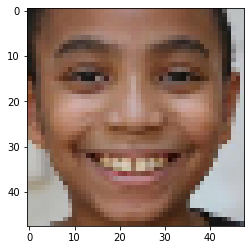

In [12]:
plt.imshow(images[87])

In [13]:
print(ages[87])

10


In [14]:
print(genders[87])

0


In [15]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [16]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [17]:
#Finding the no. of Male and Female Samples respectively

In [18]:
values, counts=np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


In [19]:
#Plotting the No. of Male and Female Samples

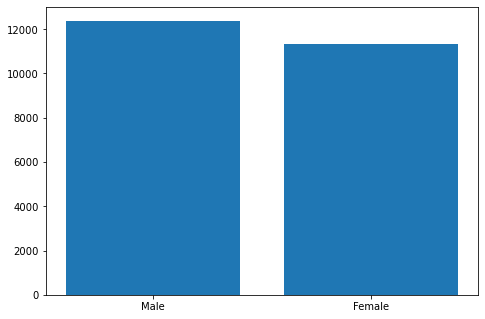

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [21]:
#Finding the no. of samples in each age

In [22]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [23]:
#Plotting the samples age wise

In [24]:
#Converting Age counts to lists

In [25]:
val=values.tolist()
cnt=counts.tolist()


In [26]:
#Plotting the samples agewise

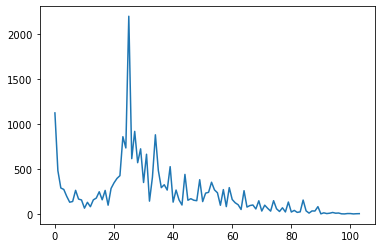

In [27]:
plt.plot(counts)
plt.xlabel=('Ages')
plt.ylabel=('Distribution')
plt.show()

In [28]:
#Defining labels for Output

In [29]:
len(genders)

23708

In [30]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

#Creating another list of images from existing one
### for better learning

In [31]:
images_f_2=images_f/255

In [32]:
images_f_2.shape

(23708, 48, 48, 3)

In [33]:
labels_f=np.array(labels)

Splitting Data set into Train

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [36]:
Y_train[0:5]

array([[68,  0],
       [ 2,  1],
       [61,  0],
       [34,  1],
       [30,  0]])

Splitting Y_test and Y_train 
further for better understanding


In [37]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [38]:
Y_train_2[0][0:5]

array([0, 1, 0, 1, 0])

In [39]:
Y_train_2[1][0:5]

array([68,  2, 61, 34, 30])

Defining the Markdown

In [40]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [41]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x
    

In [42]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation="relu")(flatten)
    dense_2=Dense(64,activation="relu")(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model

In [43]:
Model=model((48,48,3))

In [44]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [46]:
fle_s='Age_Sex_Detection.hS'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


Running the Model
This will take some time

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Train on 17781 samples, validate on 5927 samples
Epoch 1/250
17728/17781 [============================>.] - ETA: 3s - loss: 16.2524 - sex_out_loss: 0.6781 - age_out_loss: 15.3921 - sex_out_accuracy: 0.5703 - age_out_accuracy: 0.0474
Epoch 00001: val_loss improved from inf to 19.15638, saving model to Age_Sex_Detection.hS
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Age_Sex_Detection.hS\assets
17781/17781 [==============================] - 1248s 70ms/sample - loss: 16.2411 - sex_out_loss: 0.6779 - age_out_loss: 15.3787 - sex_out_accuracy: 0.5706 - age_out_accuracy: 0.0474 - val_loss: 19.1564 - val_sex_out_loss: 0.6162 - val_age_out_loss: 18.3766 - val_sex_out_accuracy: 0.7046 - val_age_out_accuracy: 0.0466
Epoch 2/250
 9664/17781 [===============>..............] - ETA: 9:59 - loss: 13.4671 - sex_out_loss: 0.5822 - age_out_loss: 12.6893 - sex_out_accuracy: 0.7065 - age_out_accuracy: 0.0486 

Model Evaluation

In [299]:
Model.evaluate(X_test,Y_test_2)


186/186 [==============================] - 20s 85ms/step - loss: 34.2589 - sex_out_loss: 0.6970 - age_out_loss: 33.2590 - sex_out_accuracy: 0.4859 - age_out_accuracy: 0.0000e+00


[34.258880615234375,
 0.6970028281211853,
 33.259002685546875,
 0.48591193556785583,
 0.0]

In [300]:
pred=Model.predict(X_test)

In [301]:
pred[1]

array([[0.16279072],
       [0.17039947],
       [0.21879297],
       ...,
       [0.15576082],
       [0.17960598],
       [0.17155835]], dtype=float32)

Plotting Loss

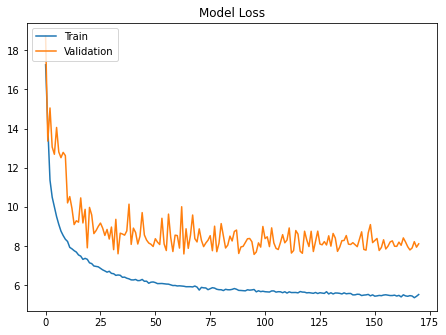

In [302]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Sex Accuracy

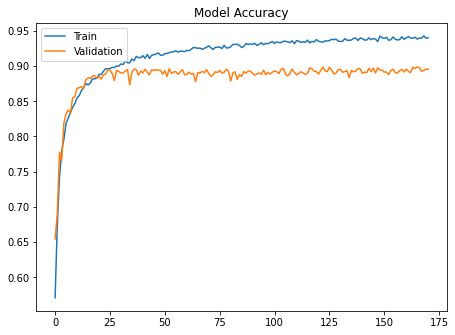

In [303]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


Plotting Gender Accuracy

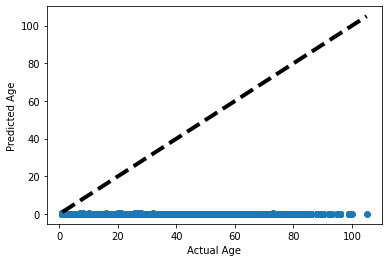

In [304]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()



Making Report of the Model

In [171]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [174]:
report=classification_report(Y_test_2[0],Pred_l)

In [175]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3066
           1       0.89      0.89      0.89      2861

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



Making Heatmap of the Model(Gender only)

In [176]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<AxesSubplot:>

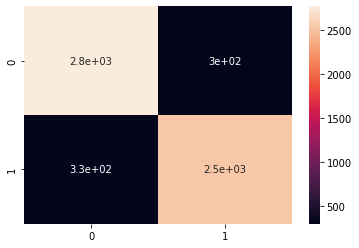

In [177]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing the images ourself

In [183]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+ sex_f[sex])


Test 1

Predicted Age is 94
Predicted Gender is Female


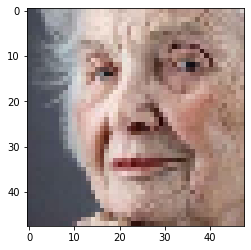

In [184]:
test_image(4,images_f,images_f_2,Model)

Test 2

Predicted Age is 12
Predicted Gender is Male


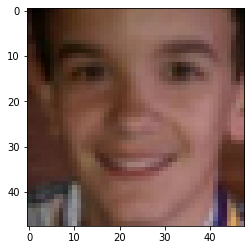

In [185]:
test_image(23,images_f,images_f_2,Model)

Test 3

Predicted Age is 10
Predicted Gender is Female


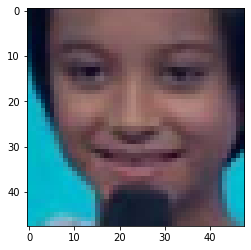

In [186]:
test_image(168,images_f,images_f_2,Model)

Test 4

Predicted Age is 17
Predicted Gender is Male


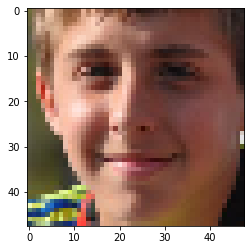

In [187]:
test_image(888,images_f,images_f_2,Model)

Test 5

Predicted Age is 0
Predicted Gender is Female


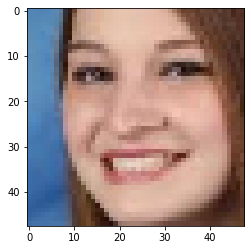

In [305]:
test_image(1288,images_f,images_f_2,Model)